## Importing Libraries :

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio

## Functions Defenition :

In [256]:
def new_figure () :
    fig = plt.figure(figsize=(40,40))
    ax = plt.axes(projection='3d')
    ax.set_xlabel('X', size=40)
    ax.set_ylabel('Y', size=40)
    ax.set_zlabel('Z', size=40)
    ax.set_xlim3d(-2, 1.2)
    ax.set_ylim3d(1, 7)
    ax.set_zlim3d(0, 1.7)
    return fig, ax

In [257]:
def plot_all_sensors_with_names (data,ax):
    nb_sensors = len(data.columns)
    for i in range (0,nb_sensors):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        y=data.loc[:,sensor_name][1]
        z=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=200, marker='d', color="g")
        ax.text(x,y,z,'%s' % (sensor_name), size=20, zorder=1,)

In [258]:
def plot_all_sensors_with_numbers (data,ax):
    nb_sensors = len(data.columns)
    for i in range (0,nb_sensors):
        sensor_name = data.columns[i]
        x=data.loc[:,sensor_name][0]
        y=data.loc[:,sensor_name][1]
        z=data.loc[:,sensor_name][2]
        ax.scatter(x,y,z,s=200, marker='d', color="g")
        ax.text(x,y,z, '%s''%s' % ('  ',i+1), size=15, zorder=1,)

In [259]:
def plot_all_segments(data,ax) :
    for i in range (0,len(segments_right)) :
        ax.plot(data.loc[:,segments_right[i]].loc['x',:],data.loc[:,segments_right[i]].loc['y',:],data.loc[:,segments_right[i]].loc['z',:], color="b")
    for i in range (0,len(segments_left)) :
        ax.plot(data.loc[:,segments_left[i]].loc['x',:],data.loc[:,segments_left[i]].loc['y',:],data.loc[:,segments_left[i]].loc['z',:], color="r")
    for i in range (0,len(segments_axial)) :
        ax.plot(data.loc[:,segments_axial[i]].loc['x',:],data.loc[:,segments_axial[i]].loc['y',:],data.loc[:,segments_axial[i]].loc['z',:], color="k")

In [260]:
def plot_head (data,ax,temps) :
    x_head = data.loc[:,'Head x'][temps]
    y_head = data.loc[:,'Head y'][temps]
    z_head = data.loc[:,'Head z'][temps]
    ax.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")

# Reading movement stairs data :

In [261]:
data=pd.read_excel('Pilot_006_JeEy_Stairs.xlsx', sheet_name ="Segment Position")
data

,Frame,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
0,0,-1.461969,4.740198,0.926992,-1.445902,4.716697,1.016530,-1.442894,4.719014,1.108954,...,0.931351,-1.521471,4.753672,0.473240,-1.497906,4.748197,0.129988,-1.517658,4.901785,0.040812
1,1,-1.461945,4.740310,0.926949,-1.445505,4.717340,1.016554,-1.442419,4.719769,1.108973,...,0.931427,-1.521438,4.753192,0.473359,-1.498051,4.748225,0.130089,-1.517637,4.901881,0.040965
2,2,-1.461920,4.740423,0.926907,-1.445109,4.717982,1.016577,-1.441944,4.720523,1.108991,...,0.931503,-1.521405,4.752711,0.473478,-1.498195,4.748253,0.130190,-1.517616,4.901978,0.041118
3,3,-1.461924,4.740518,0.926867,-1.444765,4.718567,1.016595,-1.441523,4.721208,1.109003,...,0.931568,-1.521398,4.752229,0.473582,-1.498338,4.748252,0.130278,-1.517591,4.902036,0.041248
4,4,-1.461961,4.740599,0.926830,-1.444493,4.719080,1.016604,-1.441174,4.721802,1.109007,...,0.931617,-1.521424,4.751739,0.473662,-1.498473,4.748202,0.130346,-1.517559,4.902028,0.041339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,4649,0.641050,1.924677,0.917584,0.611195,1.920971,1.006590,0.608384,1.917217,1.098974,...,0.924843,0.719564,1.964923,0.470901,0.686693,1.934932,0.129712,0.844845,1.946375,0.042104
4650,4650,0.656167,1.920991,0.919862,0.626703,1.917794,1.009020,0.624317,1.914088,1.101417,...,0.926515,0.725278,1.962492,0.471205,0.687046,1.934577,0.130368,0.845713,1.947219,0.042181
4651,4651,0.671295,1.917800,0.921807,0.642222,1.915094,1.011107,0.640255,1.911388,1.103513,...,0.927845,0.729563,1.959477,0.471363,0.687387,1.934001,0.130787,0.846023,1.947347,0.042278
4652,4652,0.686314,1.914825,0.923551,0.657651,1.912635,1.012996,0.656113,1.908916,1.105409,...,0.928929,0.732954,1.956060,0.471455,0.687730,1.933281,0.131103,0.846100,1.947163,0.042387


In [262]:
columns= data.columns
columns

Index(['Frame', 'Pelvis x', 'Pelvis y', 'Pelvis z', 'L5 x', 'L5 y', 'L5 z',
       'L3 x', 'L3 y', 'L3 z', 'T12 x', 'T12 y', 'T12 z', 'T8 x', 'T8 y',
       'T8 z', 'Neck x', 'Neck y', 'Neck z', 'Head x', 'Head y', 'Head z',
       'Right Shoulder x', 'Right Shoulder y', 'Right Shoulder z',
       'Right Upper Arm x', 'Right Upper Arm y', 'Right Upper Arm z',
       'Right Forearm x', 'Right Forearm y', 'Right Forearm z', 'Right Hand x',
       'Right Hand y', 'Right Hand z', 'Left Shoulder x', 'Left Shoulder y',
       'Left Shoulder z', 'Left Upper Arm x', 'Left Upper Arm y',
       'Left Upper Arm z', 'Left Forearm x', 'Left Forearm y',
       'Left Forearm z', 'Left Hand x', 'Left Hand y', 'Left Hand z',
       'Right Upper Leg x', 'Right Upper Leg y', 'Right Upper Leg z',
       'Right Lower Leg x', 'Right Lower Leg y', 'Right Lower Leg z',
       'Right Foot x', 'Right Foot y', 'Right Foot z', 'Right Toe x',
       'Right Toe y', 'Right Toe z', 'Left Upper Leg x', 'Left Upper Leg

## Preparing 3 arrays : 
1. segments_right contains the segments of the right limbs 
2. segments_left contains the segments of the left limbs 
3. segments_axial contains the segments of the axial part

In [263]:
segments_right=np.array([['Neck', 'Right Shoulder'],['Right Upper Arm', 'Right Shoulder'],['Right Forearm','Right Hand'],['Right Forearm','Right Upper Arm'],['Right Upper Leg', 'Right Lower Leg'],['Right Upper Leg', 'Pelvis'],['Right Foot', 'Right Lower Leg'],['Right Foot', 'Right Toe']])
segments_left=np.array([['Left Forearm','Left Hand'],['Left Forearm','Left Upper Arm'],['Neck', 'Left Shoulder'],['Left Upper Arm', 'Left Shoulder'],['Left Upper Leg', 'Pelvis'],['Left Foot', 'Left Lower Leg'],['Left Foot', 'Left Toe'],['Left Upper Leg', 'Left Lower Leg']])
segments_axial=np.array([['Neck', 'Head'],['T8', 'Neck'],['T12', 'T8'],['L3', 'T12'],['L3', 'L5'],['L5', 'Pelvis']])

In [264]:
print('segments_right :')
print(segments_right)
print('\nsegments_left :')
print(segments_left)
print('\nsegments_axial :')
print(segments_axial)

segments_right :
[['Neck' 'Right Shoulder']
 ['Right Upper Arm' 'Right Shoulder']
 ['Right Forearm' 'Right Hand']
 ['Right Forearm' 'Right Upper Arm']
 ['Right Upper Leg' 'Right Lower Leg']
 ['Right Upper Leg' 'Pelvis']
 ['Right Foot' 'Right Lower Leg']
 ['Right Foot' 'Right Toe']]

segments_left :
[['Left Forearm' 'Left Hand']
 ['Left Forearm' 'Left Upper Arm']
 ['Neck' 'Left Shoulder']
 ['Left Upper Arm' 'Left Shoulder']
 ['Left Upper Leg' 'Pelvis']
 ['Left Foot' 'Left Lower Leg']
 ['Left Foot' 'Left Toe']
 ['Left Upper Leg' 'Left Lower Leg']]

segments_axial :
[['Neck' 'Head']
 ['T8' 'Neck']
 ['T12' 'T8']
 ['L3' 'T12']
 ['L3' 'L5']
 ['L5' 'Pelvis']]


# Extracting data for time = 0 :

In [265]:
l=data.shape[1]
datax=[]; datay=[]; dataz=[]
for i in range (1,l,3):
    datax.append(data.loc[:,data.columns[i]][0])  #extract all the x's from the first column and store them in datax list
    datay.append(data.loc[:,data.columns[i+1]][0])  #extract all the y's from the first column and store them in datay list
    dataz.append(data.loc[:,data.columns[i+2]][0])  #extract all the z's from the first column and store them in dataz list

In [266]:
ar=np.array([datax,datay,dataz])
ar

array([[-1.46196869, -1.44590192, -1.44289429, -1.43909605, -1.43902328,
        -1.4498733 , -1.44802323, -1.42451698, -1.33091879, -1.31150646,
        -1.29821302, -1.46432268, -1.5732341 , -1.5736951 , -1.5784913 ,
        -1.39155897, -1.40134176, -1.40981623, -1.47005831, -1.53196249,
        -1.52147113, -1.49790626, -1.51765804],
       [ 4.74019817,  4.71669717,  4.71901424,  4.72003391,  4.72765532,
         4.7545356 ,  4.79399716,  4.75475943,  4.8302209 ,  4.80059702,
         4.78317192,  4.72733644,  4.67276963,  4.66464892,  4.65247688,
         4.77532363,  4.74974287,  4.72344367,  4.87605296,  4.70446165,
         4.75367219,  4.74819702,  4.90178458],
       [ 0.92699201,  1.01652977,  1.10895436,  1.19338542,  1.27746879,
         1.3886864 ,  1.48152368,  1.33837237,  1.31232968,  1.04565219,
         0.82890768,  1.34112352,  1.32398888,  1.05509626,  0.83764134,
         0.92487603,  0.46482252,  0.12182995,  0.04313222,  0.93135087,
         0.47323962,  0.1299

In [267]:
df = pd.DataFrame(ar, index = ['x', 'y', 'z'], columns = ['Pelvis','L5','L3','T12','T8','Neck','Head','Right Shoulder','Right Upper Arm','Right Forearm','Right Hand','Left Shoulder','Left Upper Arm','Left Forearm','Left Hand','Right Upper Leg','Right Lower Leg','Right Foot','Right Toe','Left Upper Leg','Left Lower Leg','Left Foot','Left Toe'])
df

,Pelvis,L5,L3,T12,T8,Neck,Head,Right Shoulder,Right Upper Arm,Right Forearm,...,Left Forearm,Left Hand,Right Upper Leg,Right Lower Leg,Right Foot,Right Toe,Left Upper Leg,Left Lower Leg,Left Foot,Left Toe
x,-1.461969,-1.445902,-1.442894,-1.439096,-1.439023,-1.449873,-1.448023,-1.424517,-1.330919,-1.311506,...,-1.573695,-1.578491,-1.391559,-1.401342,-1.409816,-1.470058,-1.531962,-1.521471,-1.497906,-1.517658
y,4.740198,4.716697,4.719014,4.720034,4.727655,4.754536,4.793997,4.754759,4.830221,4.800597,...,4.664649,4.652477,4.775324,4.749743,4.723444,4.876053,4.704462,4.753672,4.748197,4.901785
z,0.926992,1.016530,1.108954,1.193385,1.277469,1.388686,1.481524,1.338372,1.312330,1.045652,...,1.055096,0.837641,0.924876,0.464823,0.121830,0.043132,0.931351,0.473240,0.129988,0.040812


In [268]:
new_df = df.transpose()
new_df

,x,y,z
Pelvis,-1.461969,4.740198,0.926992
L5,-1.445902,4.716697,1.016530
L3,-1.442894,4.719014,1.108954
T12,-1.439096,4.720034,1.193385
T8,-1.439023,4.727655,1.277469
Neck,-1.449873,4.754536,1.388686
Head,-1.448023,4.793997,1.481524
Right Shoulder,-1.424517,4.754759,1.338372
Right Upper Arm,-1.330919,4.830221,1.312330
Right Forearm,-1.311506,4.800597,1.045652


In [269]:
new_df.describe()

,x,y,z
count,23.000000,23.000000,23.000000
mean,-1.453194,4.751774,0.895944
std,0.077157,0.060754,0.462104
min,-1.578491,4.652477,0.040812
25%,-1.507782,4.719524,0.651074
50%,-1.448023,4.748197,1.016530
75%,-1.417167,4.779248,1.294899
max,-1.298213,4.901785,1.481524


# Visualizing data for time = 0 :

## Drawing the skeleton with the names of the sensors :

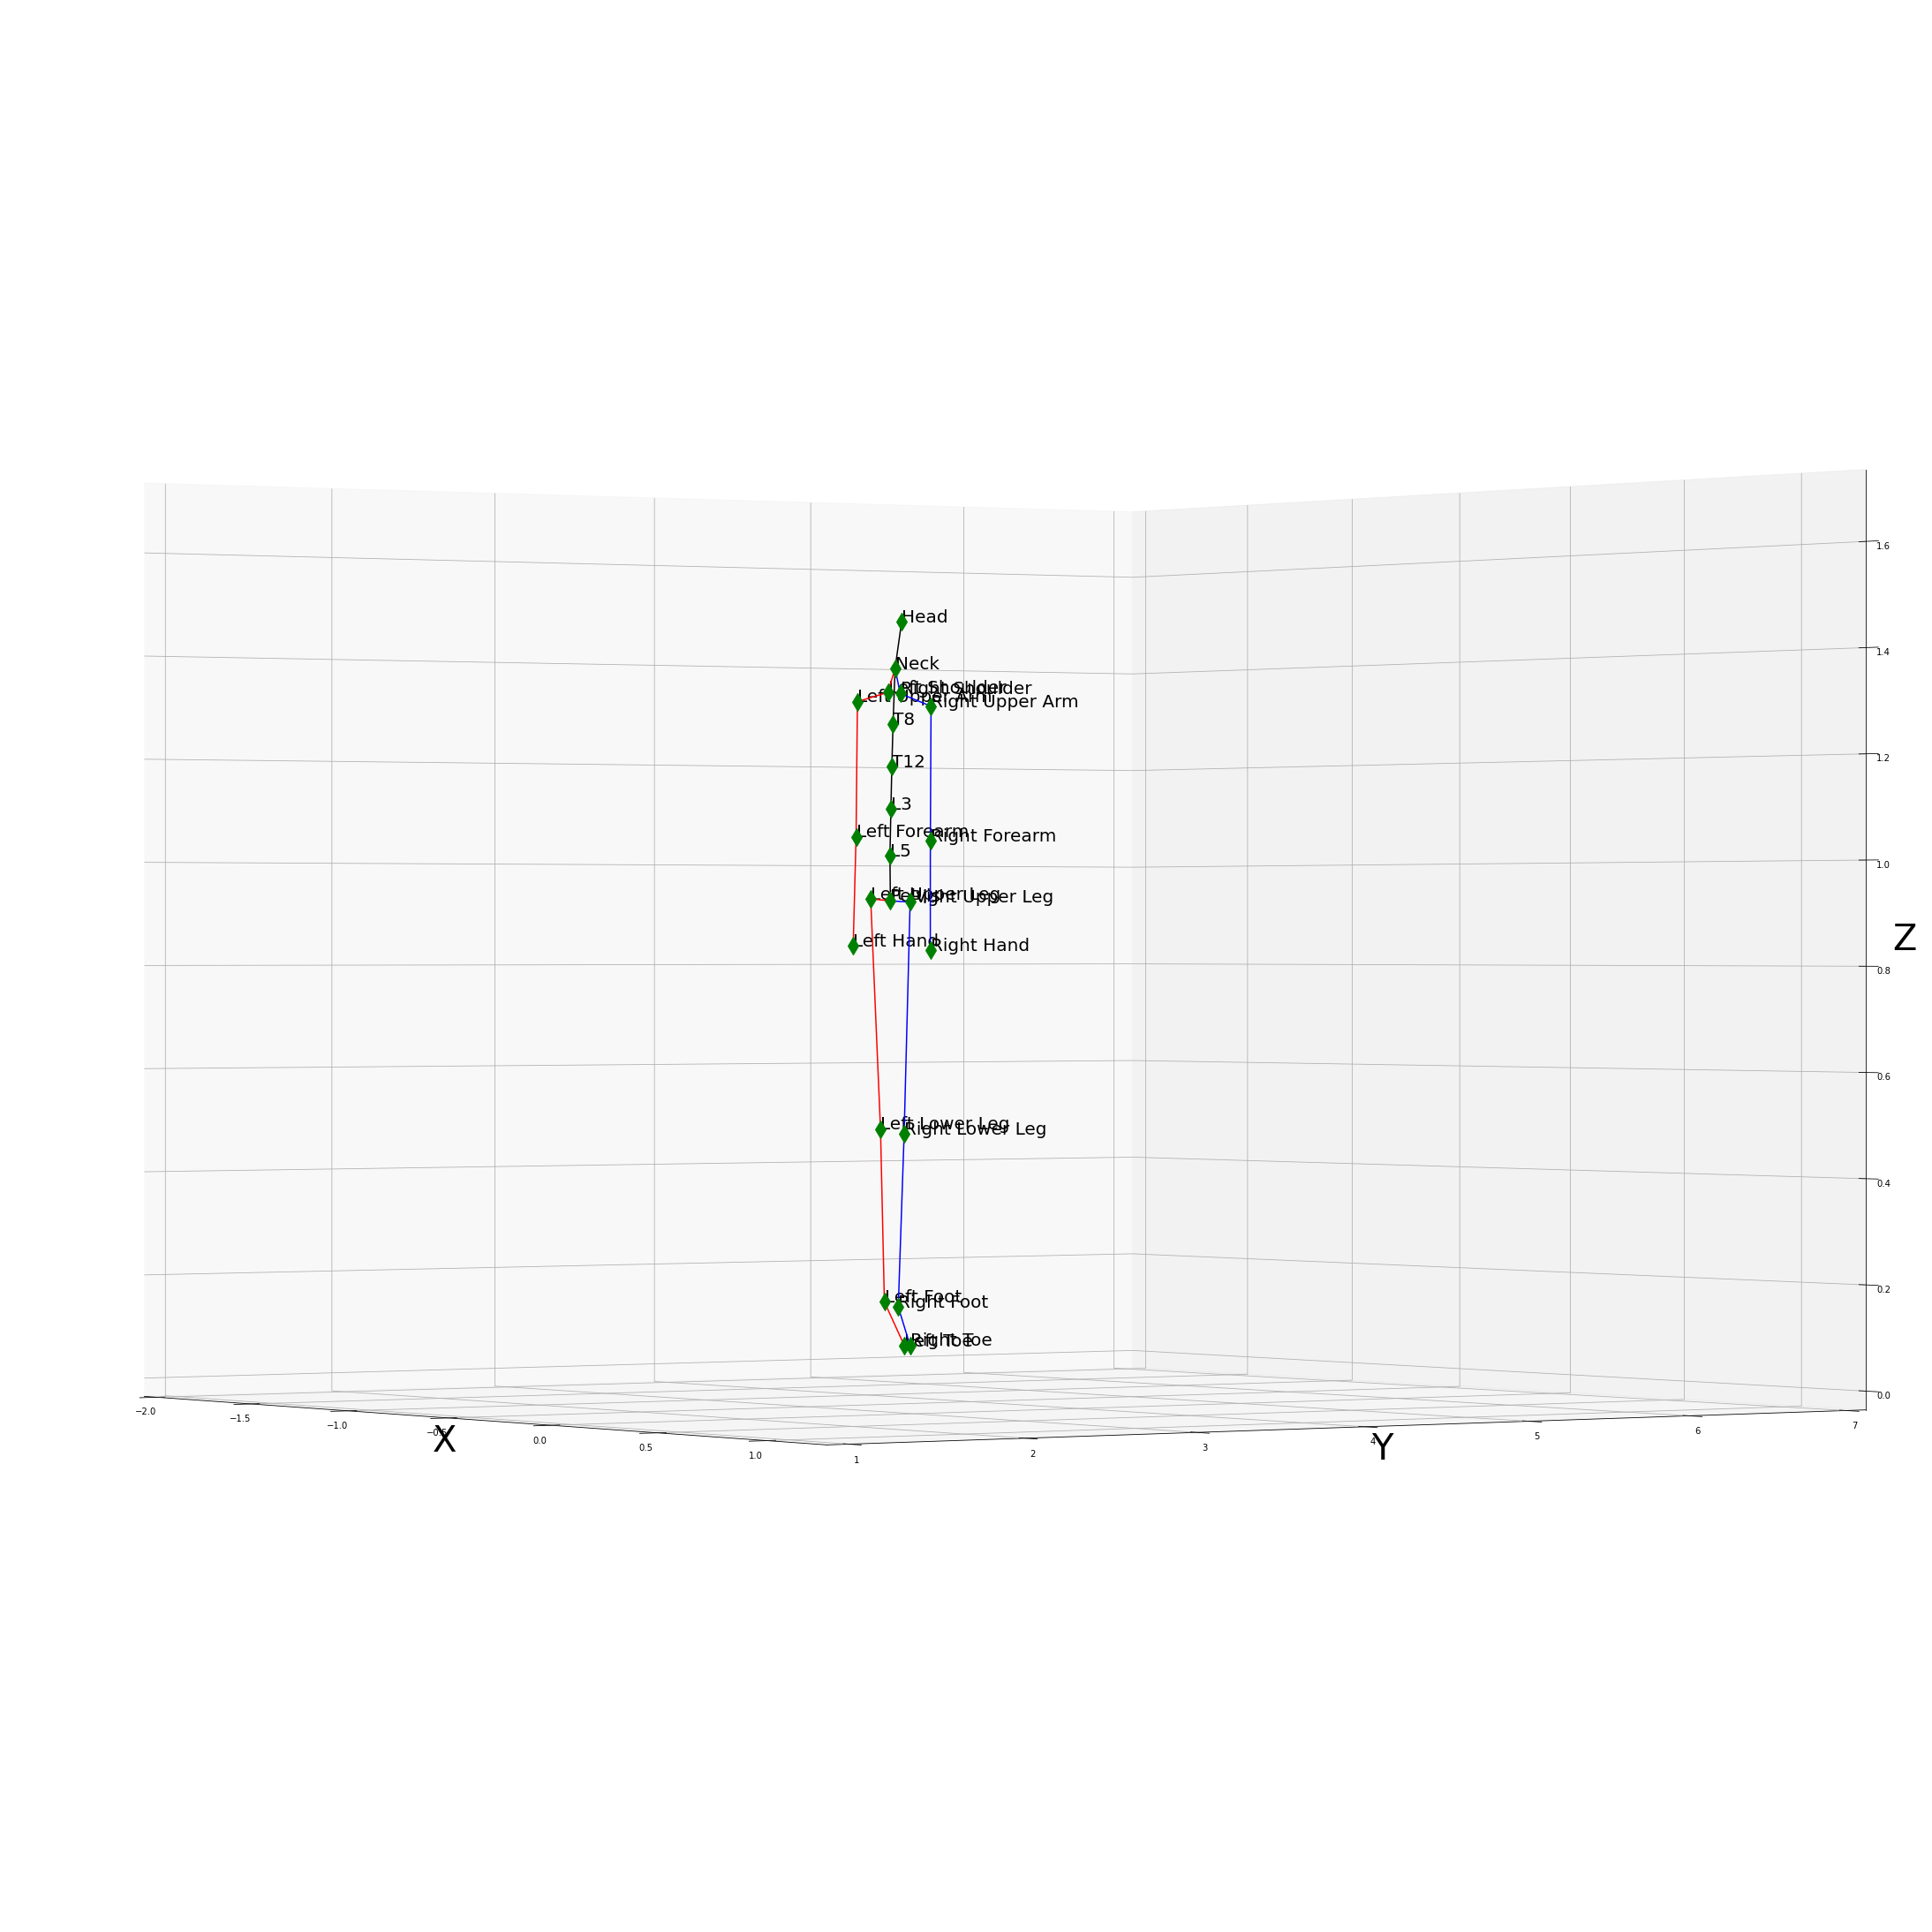

In [270]:
fig1, ax1 = new_figure()
plot_all_sensors_with_names (df,ax1)
plot_all_segments(df,ax1)
ax1.view_init(0, -35)

#### Draw the head :

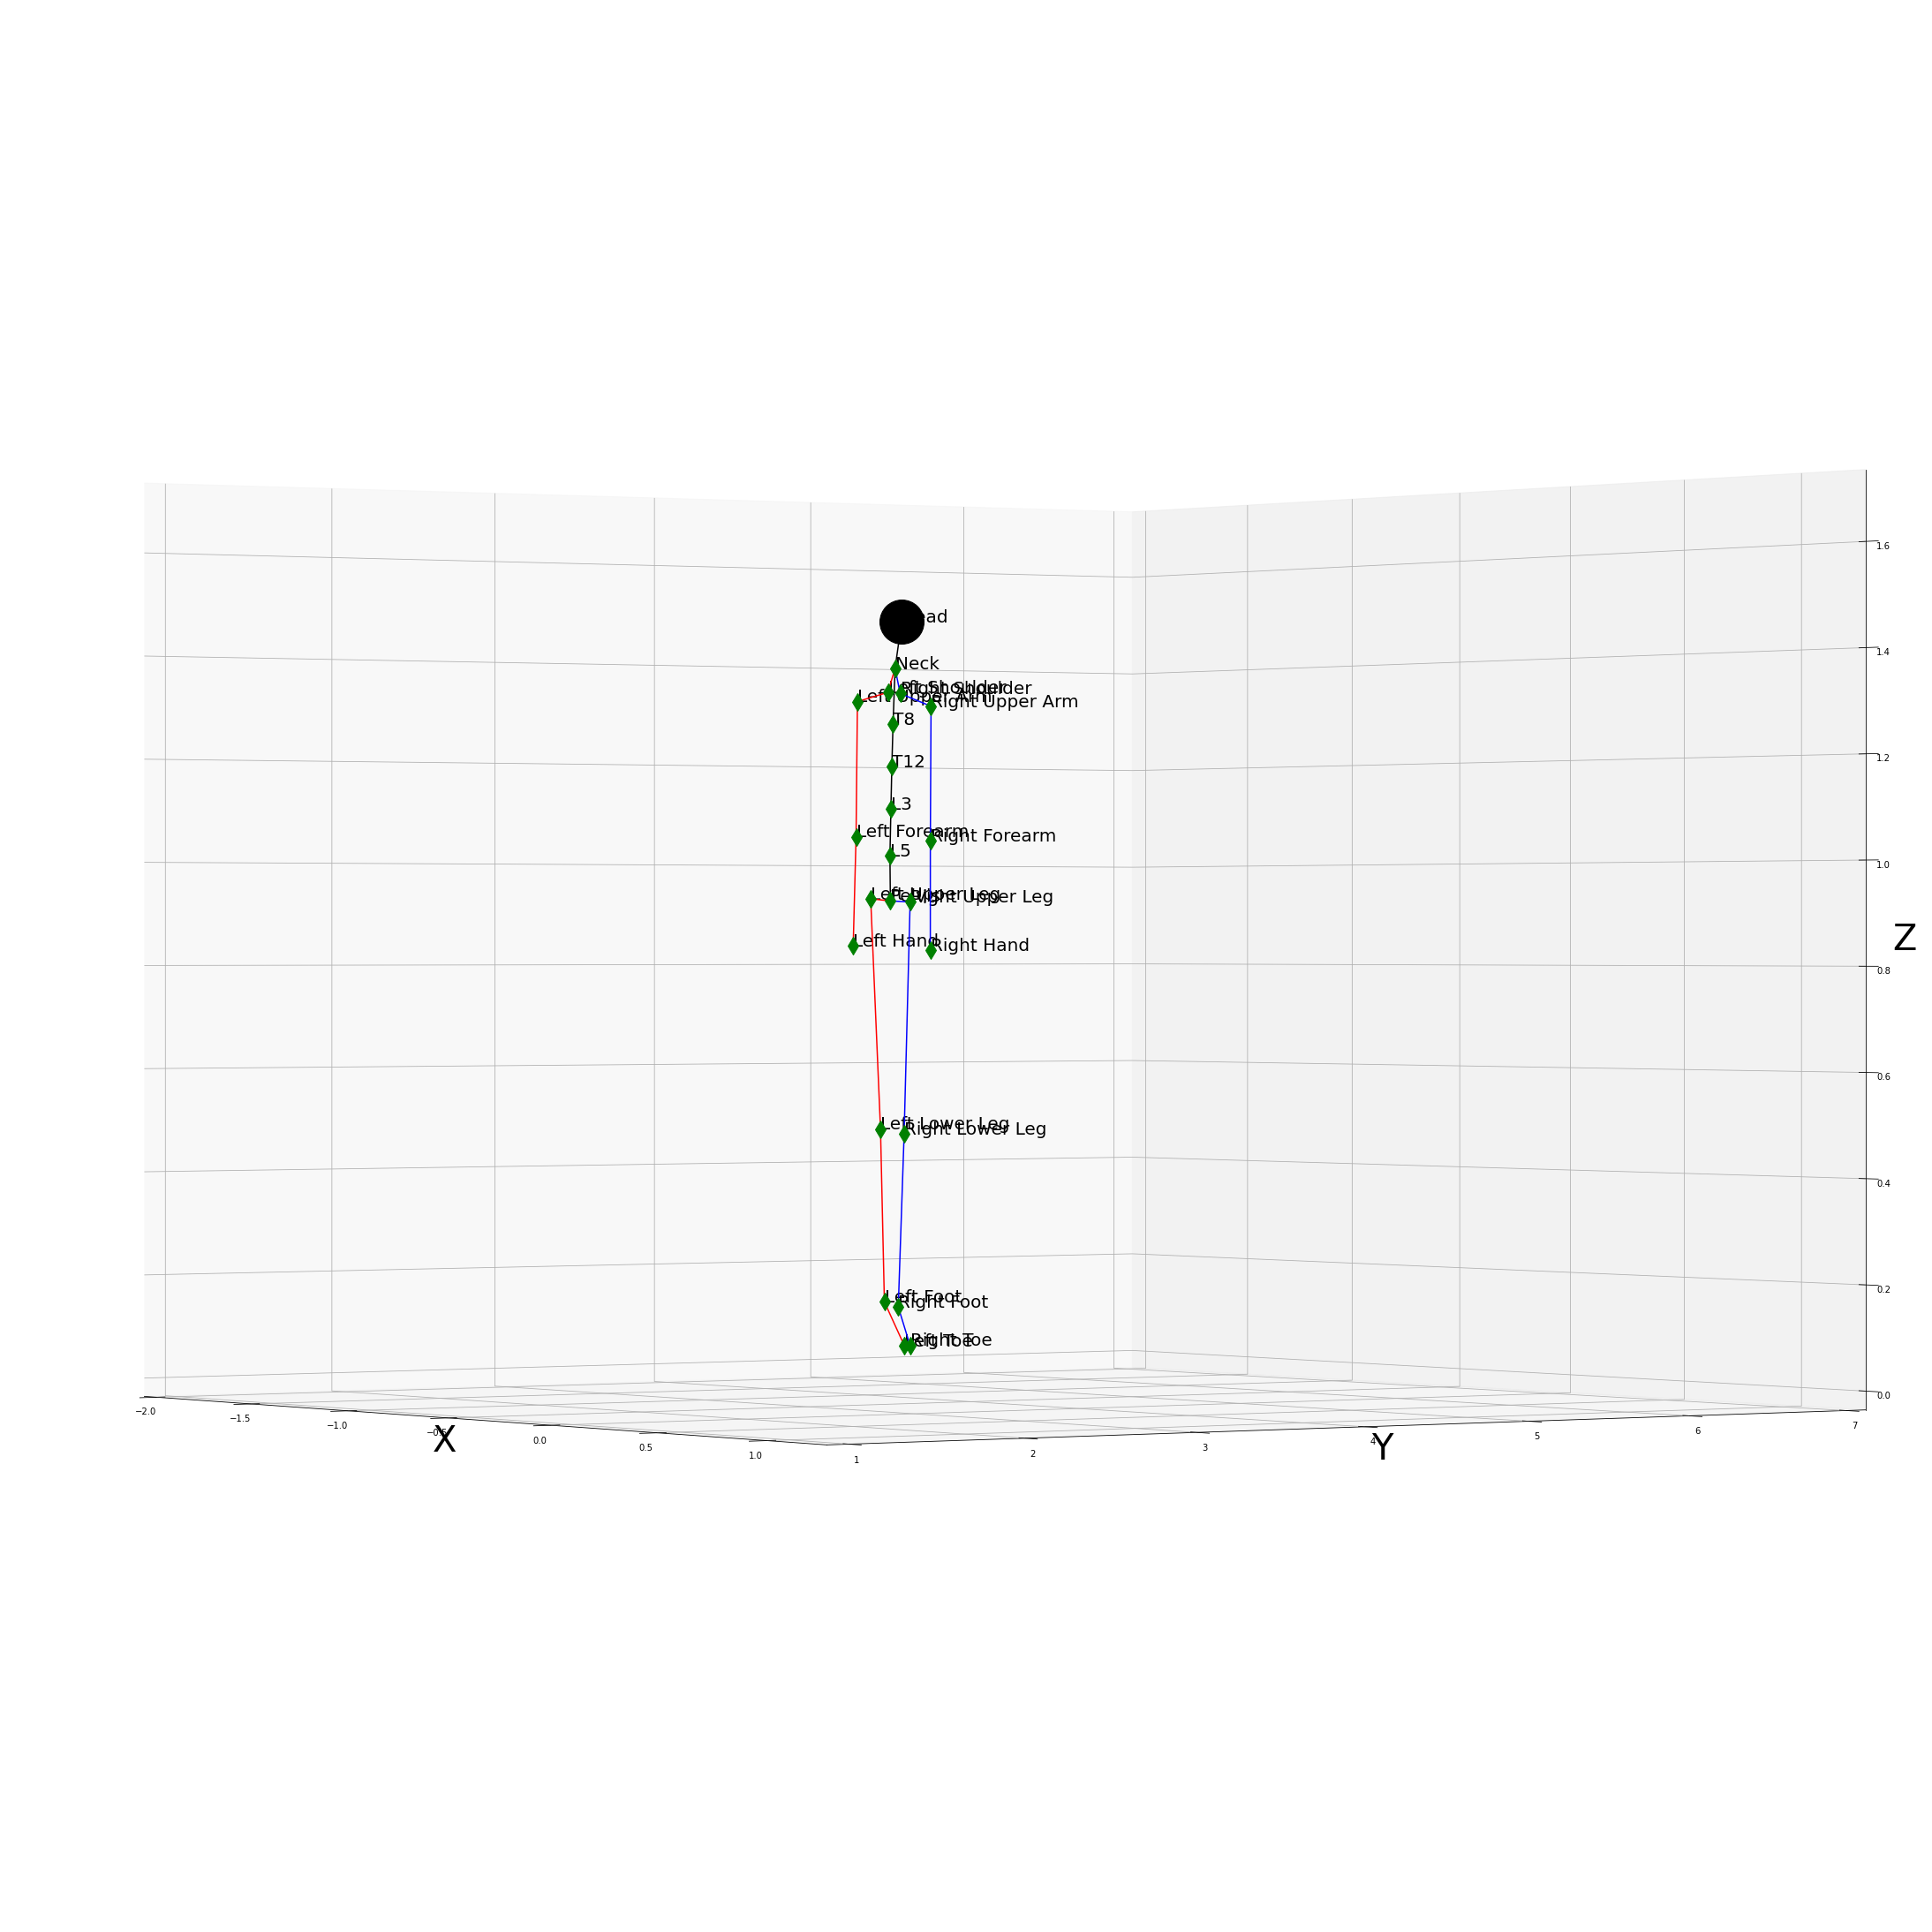

In [271]:
x_head = data.loc[:,'Head x'][0]
y_head = data.loc[:,'Head y'][0]
z_head = data.loc[:,'Head z'][0]
ax1.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")
fig1

### Saving the image

In [308]:
images = []
ax1.azim = ax1.azim+1.1
fig1.canvas.draw()
image1 = np.frombuffer(fig1.canvas.tostring_rgb(), dtype='uint8') 
images.append(image1) 
imageio.mimsave('test.gif', images)

ValueError: Image must be 2D (grayscale, RGB, or RGBA).

## Drawing the skeleton with the numbers of sensors :

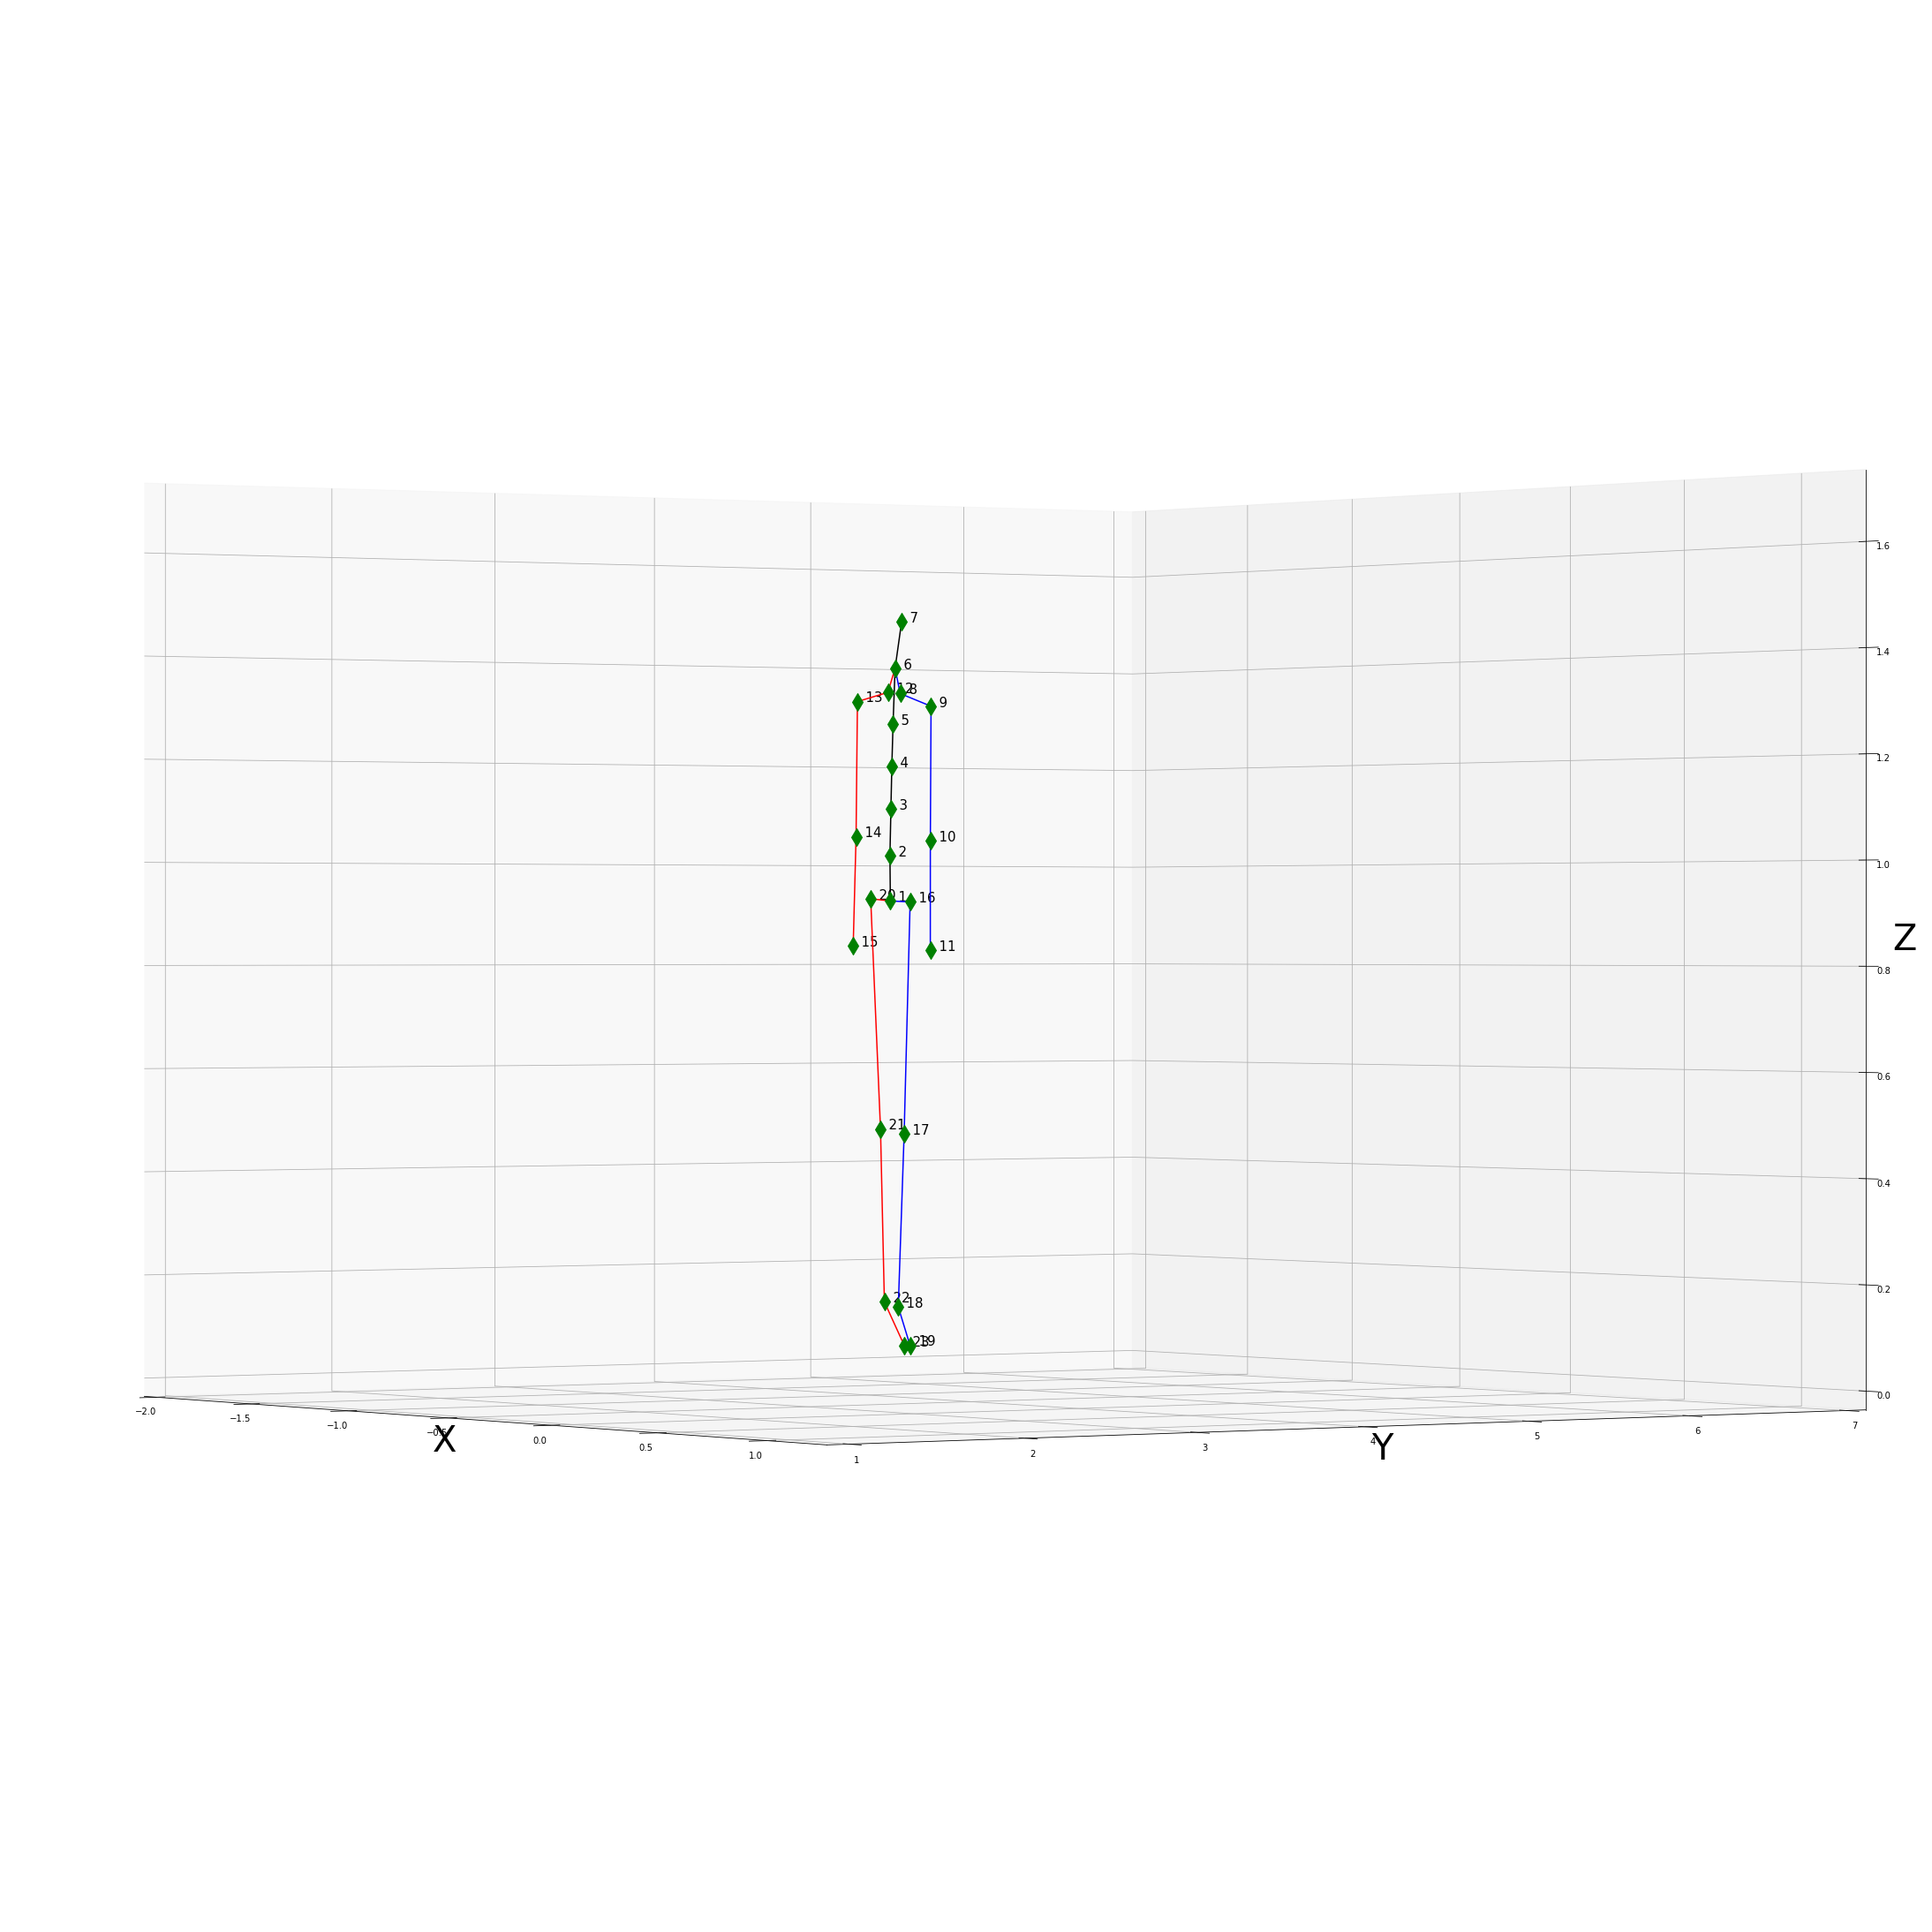

In [272]:
fig2, ax2 = new_figure()
plot_all_sensors_with_numbers(df,ax2)
plot_all_segments(df,ax2)
ax2.view_init(0, -35)
ax2.quiver(0,0,0,0,0.0000001,0,length=1.0)

#### Draw the head

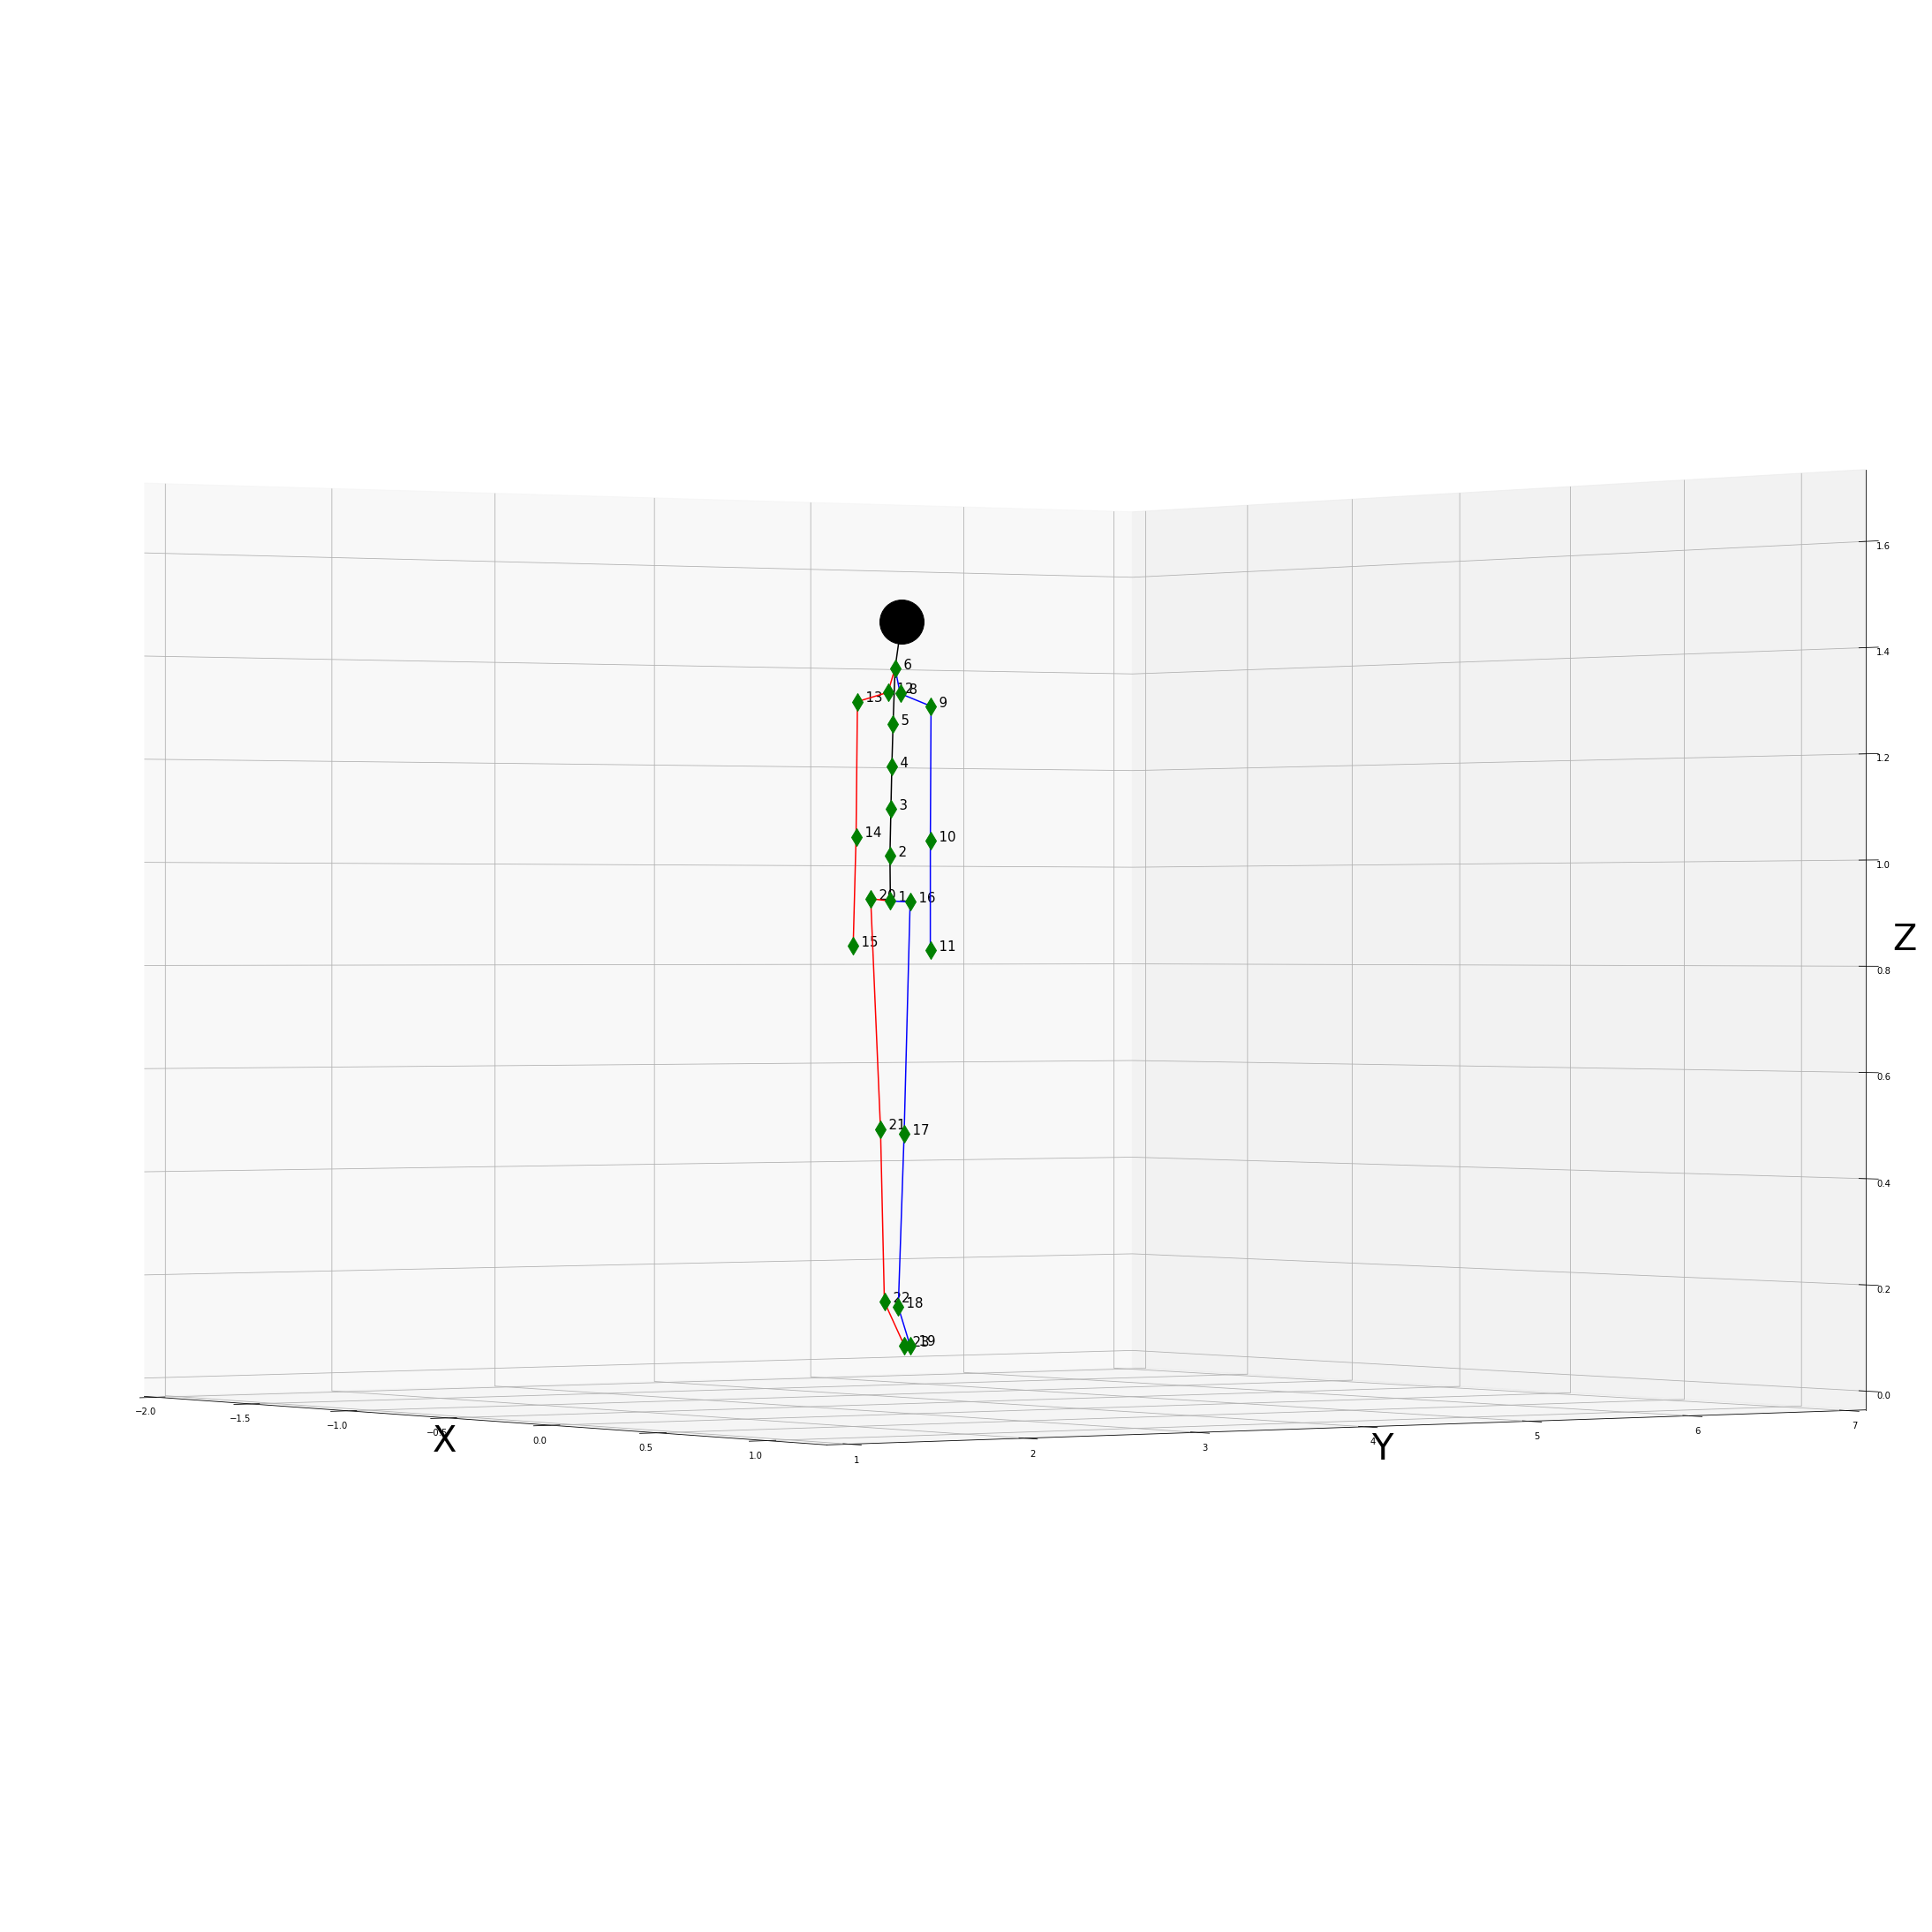

In [273]:
x_head = data.loc[:,'Head x'][0]
y_head = data.loc[:,'Head y'][0]
z_head = data.loc[:,'Head z'][0]
ax2.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")
fig2

# Extracting data for time = 1000 :

In [274]:
l=data.shape[1]
datax=[]; datay=[]; dataz=[]
for i in range (1,l,3):
    datax.append(data.loc[:,data.columns[i]][1000])  #extract all the x's from the first column and store them in datax list
    datay.append(data.loc[:,data.columns[i+1]][1000])  #extract all the y's from the first column and store them in datay list
    dataz.append(data.loc[:,data.columns[i+2]][1000])  #extract all the z's from the first column and store them in dataz list

In [275]:
ar2=np.array([datax,datay,dataz])
ar2

array([[-1.21725983, -1.21926353, -1.21154063, -1.20269148, -1.19068266,
        -1.16957487, -1.14051302, -1.15573934, -1.03630672, -1.03917148,
        -1.03685043, -1.2029791 , -1.32139055, -1.35080699, -1.37062041,
        -1.13967376, -1.0198992 , -0.97798789, -1.04016497, -1.294917  ,
        -1.28218003, -1.27151434, -1.27408558],
       [ 5.25457661,  5.23717891,  5.24736901,  5.25477738,  5.26912201,
         5.30728516,  5.34263569,  5.28473737,  5.27150862,  5.21861239,
         5.17871391,  5.29328436,  5.32531603,  5.31838709,  5.34343499,
         5.24134433,  5.52232275,  5.418147  ,  5.55487254,  5.26734389,
         5.26964155,  5.18975344,  5.346884  ],
       [ 0.92085011,  1.01315816,  1.10477277,  1.18850377,  1.27083322,
         1.37717099,  1.46708855,  1.32746675,  1.30110098,  1.0373518 ,
         0.82320148,  1.33378562,  1.32455769,  1.05725188,  0.84176366,
         0.92147616,  0.57636268,  0.25100094,  0.14822841,  0.92254263,
         0.4618615 ,  0.1273

In [276]:
df2 = pd.DataFrame(ar2, index = ['x', 'y', 'z'], columns = ['Pelvis','L5','L3','T12','T8','Neck','Head','Right Shoulder','Right Upper Arm','Right Forearm','Right Hand','Left Shoulder','Left Upper Arm','Left Forearm','Left Hand','Right Upper Leg','Right Lower Leg','Right Foot','Right Toe','Left Upper Leg','Left Lower Leg','Left Foot','Left Toe'])
df2

,Pelvis,L5,L3,T12,T8,Neck,Head,Right Shoulder,Right Upper Arm,Right Forearm,...,Left Forearm,Left Hand,Right Upper Leg,Right Lower Leg,Right Foot,Right Toe,Left Upper Leg,Left Lower Leg,Left Foot,Left Toe
x,-1.217260,-1.219264,-1.211541,-1.202691,-1.190683,-1.169575,-1.140513,-1.155739,-1.036307,-1.039171,...,-1.350807,-1.370620,-1.139674,-1.019899,-0.977988,-1.040165,-1.294917,-1.282180,-1.271514,-1.274086
y,5.254577,5.237179,5.247369,5.254777,5.269122,5.307285,5.342636,5.284737,5.271509,5.218612,...,5.318387,5.343435,5.241344,5.522323,5.418147,5.554873,5.267344,5.269642,5.189753,5.346884
z,0.920850,1.013158,1.104773,1.188504,1.270833,1.377171,1.467089,1.327467,1.301101,1.037352,...,1.057252,0.841764,0.921476,0.576363,0.251001,0.148228,0.922543,0.461861,0.127340,0.040758


In [277]:
new_df2 = df2.transpose()
new_df2

,x,y,z
Pelvis,-1.217260,5.254577,0.920850
L5,-1.219264,5.237179,1.013158
L3,-1.211541,5.247369,1.104773
T12,-1.202691,5.254777,1.188504
T8,-1.190683,5.269122,1.270833
Neck,-1.169575,5.307285,1.377171
Head,-1.140513,5.342636,1.467089
Right Shoulder,-1.155739,5.284737,1.327467
Right Upper Arm,-1.036307,5.271509,1.301101
Right Forearm,-1.039171,5.218612,1.037352


In [278]:
new_df2.describe()

,x,y,z
count,23.000000,23.000000,23.000000
mean,-1.181122,5.302489,0.906019
std,0.113273,0.092177,0.437380
min,-1.370620,5.178714,0.040758
25%,-1.272800,5.250973,0.699782
50%,-1.202691,5.271509,1.013158
75%,-1.089919,5.333976,1.285967
max,-0.977988,5.554873,1.467089


# Visualizing data for time = 1000 :

## Drawing the skeleton with the names of the sensors :

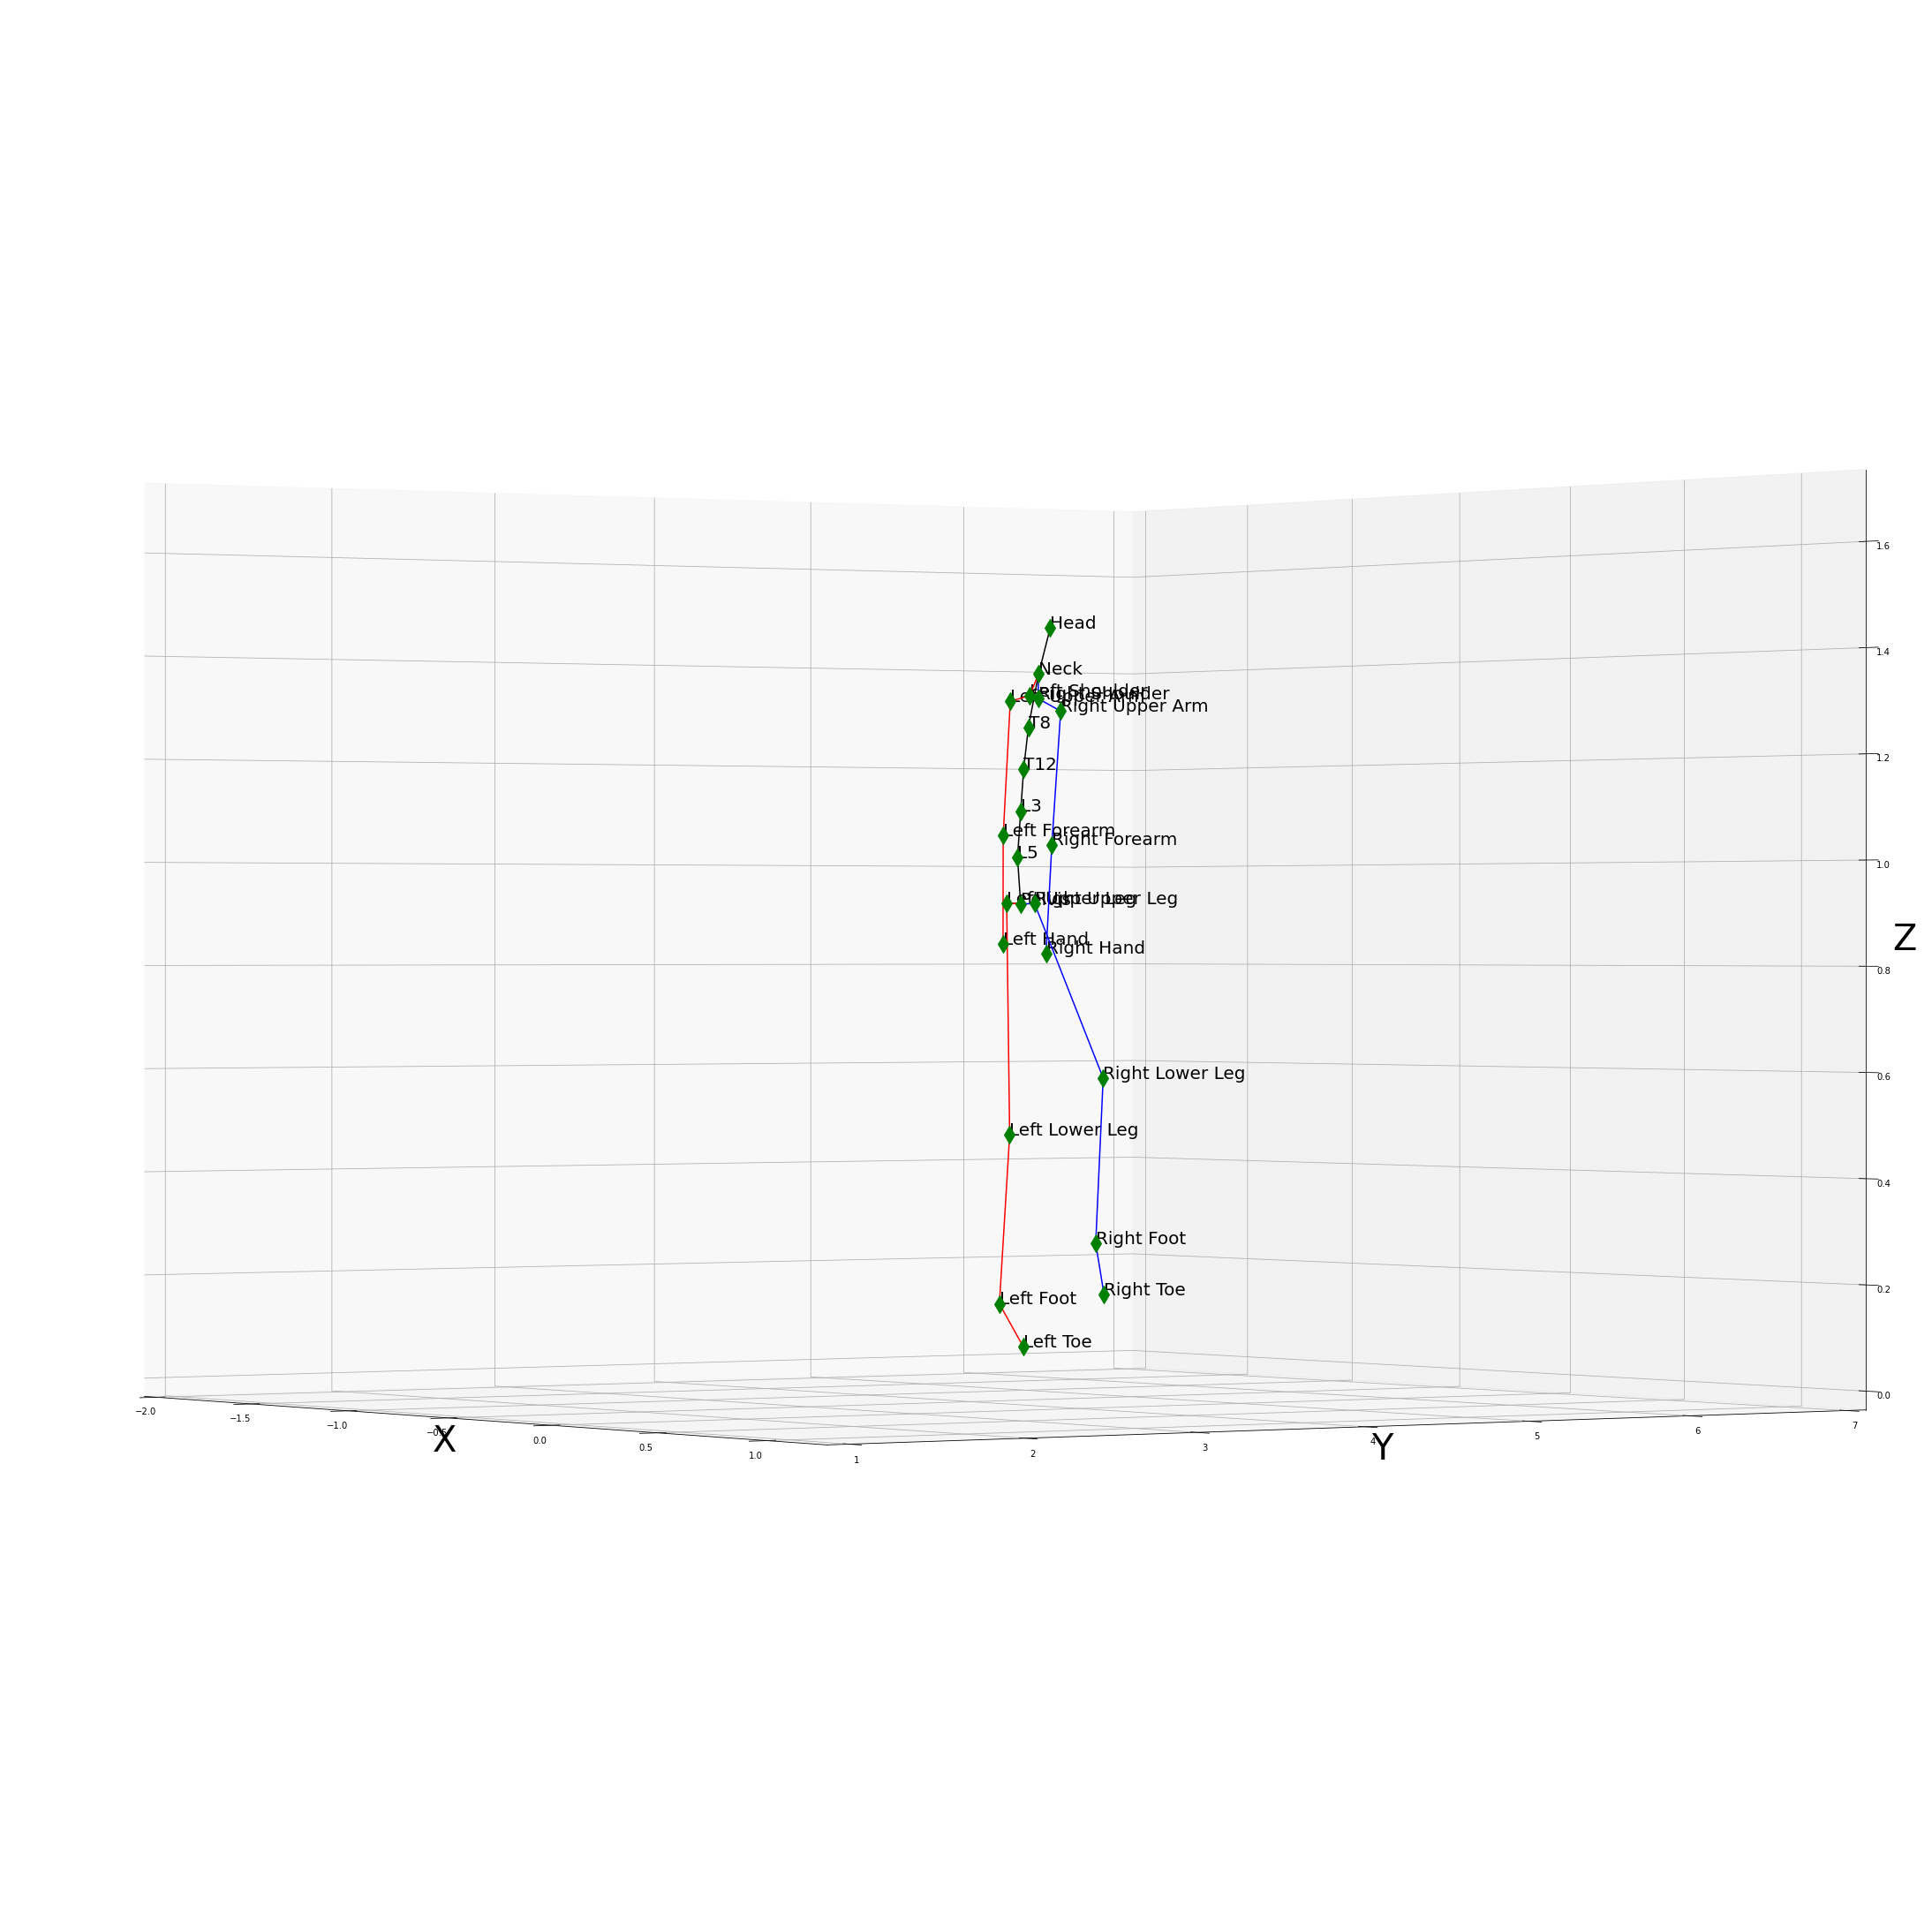

In [279]:
fig3, ax3 = new_figure()
plot_all_sensors_with_names (df2,ax3)
plot_all_segments(df2,ax3)
ax3.view_init(0, -35)
ax3.quiver(0,0,0,0,0.0000001,0,length=1.0)

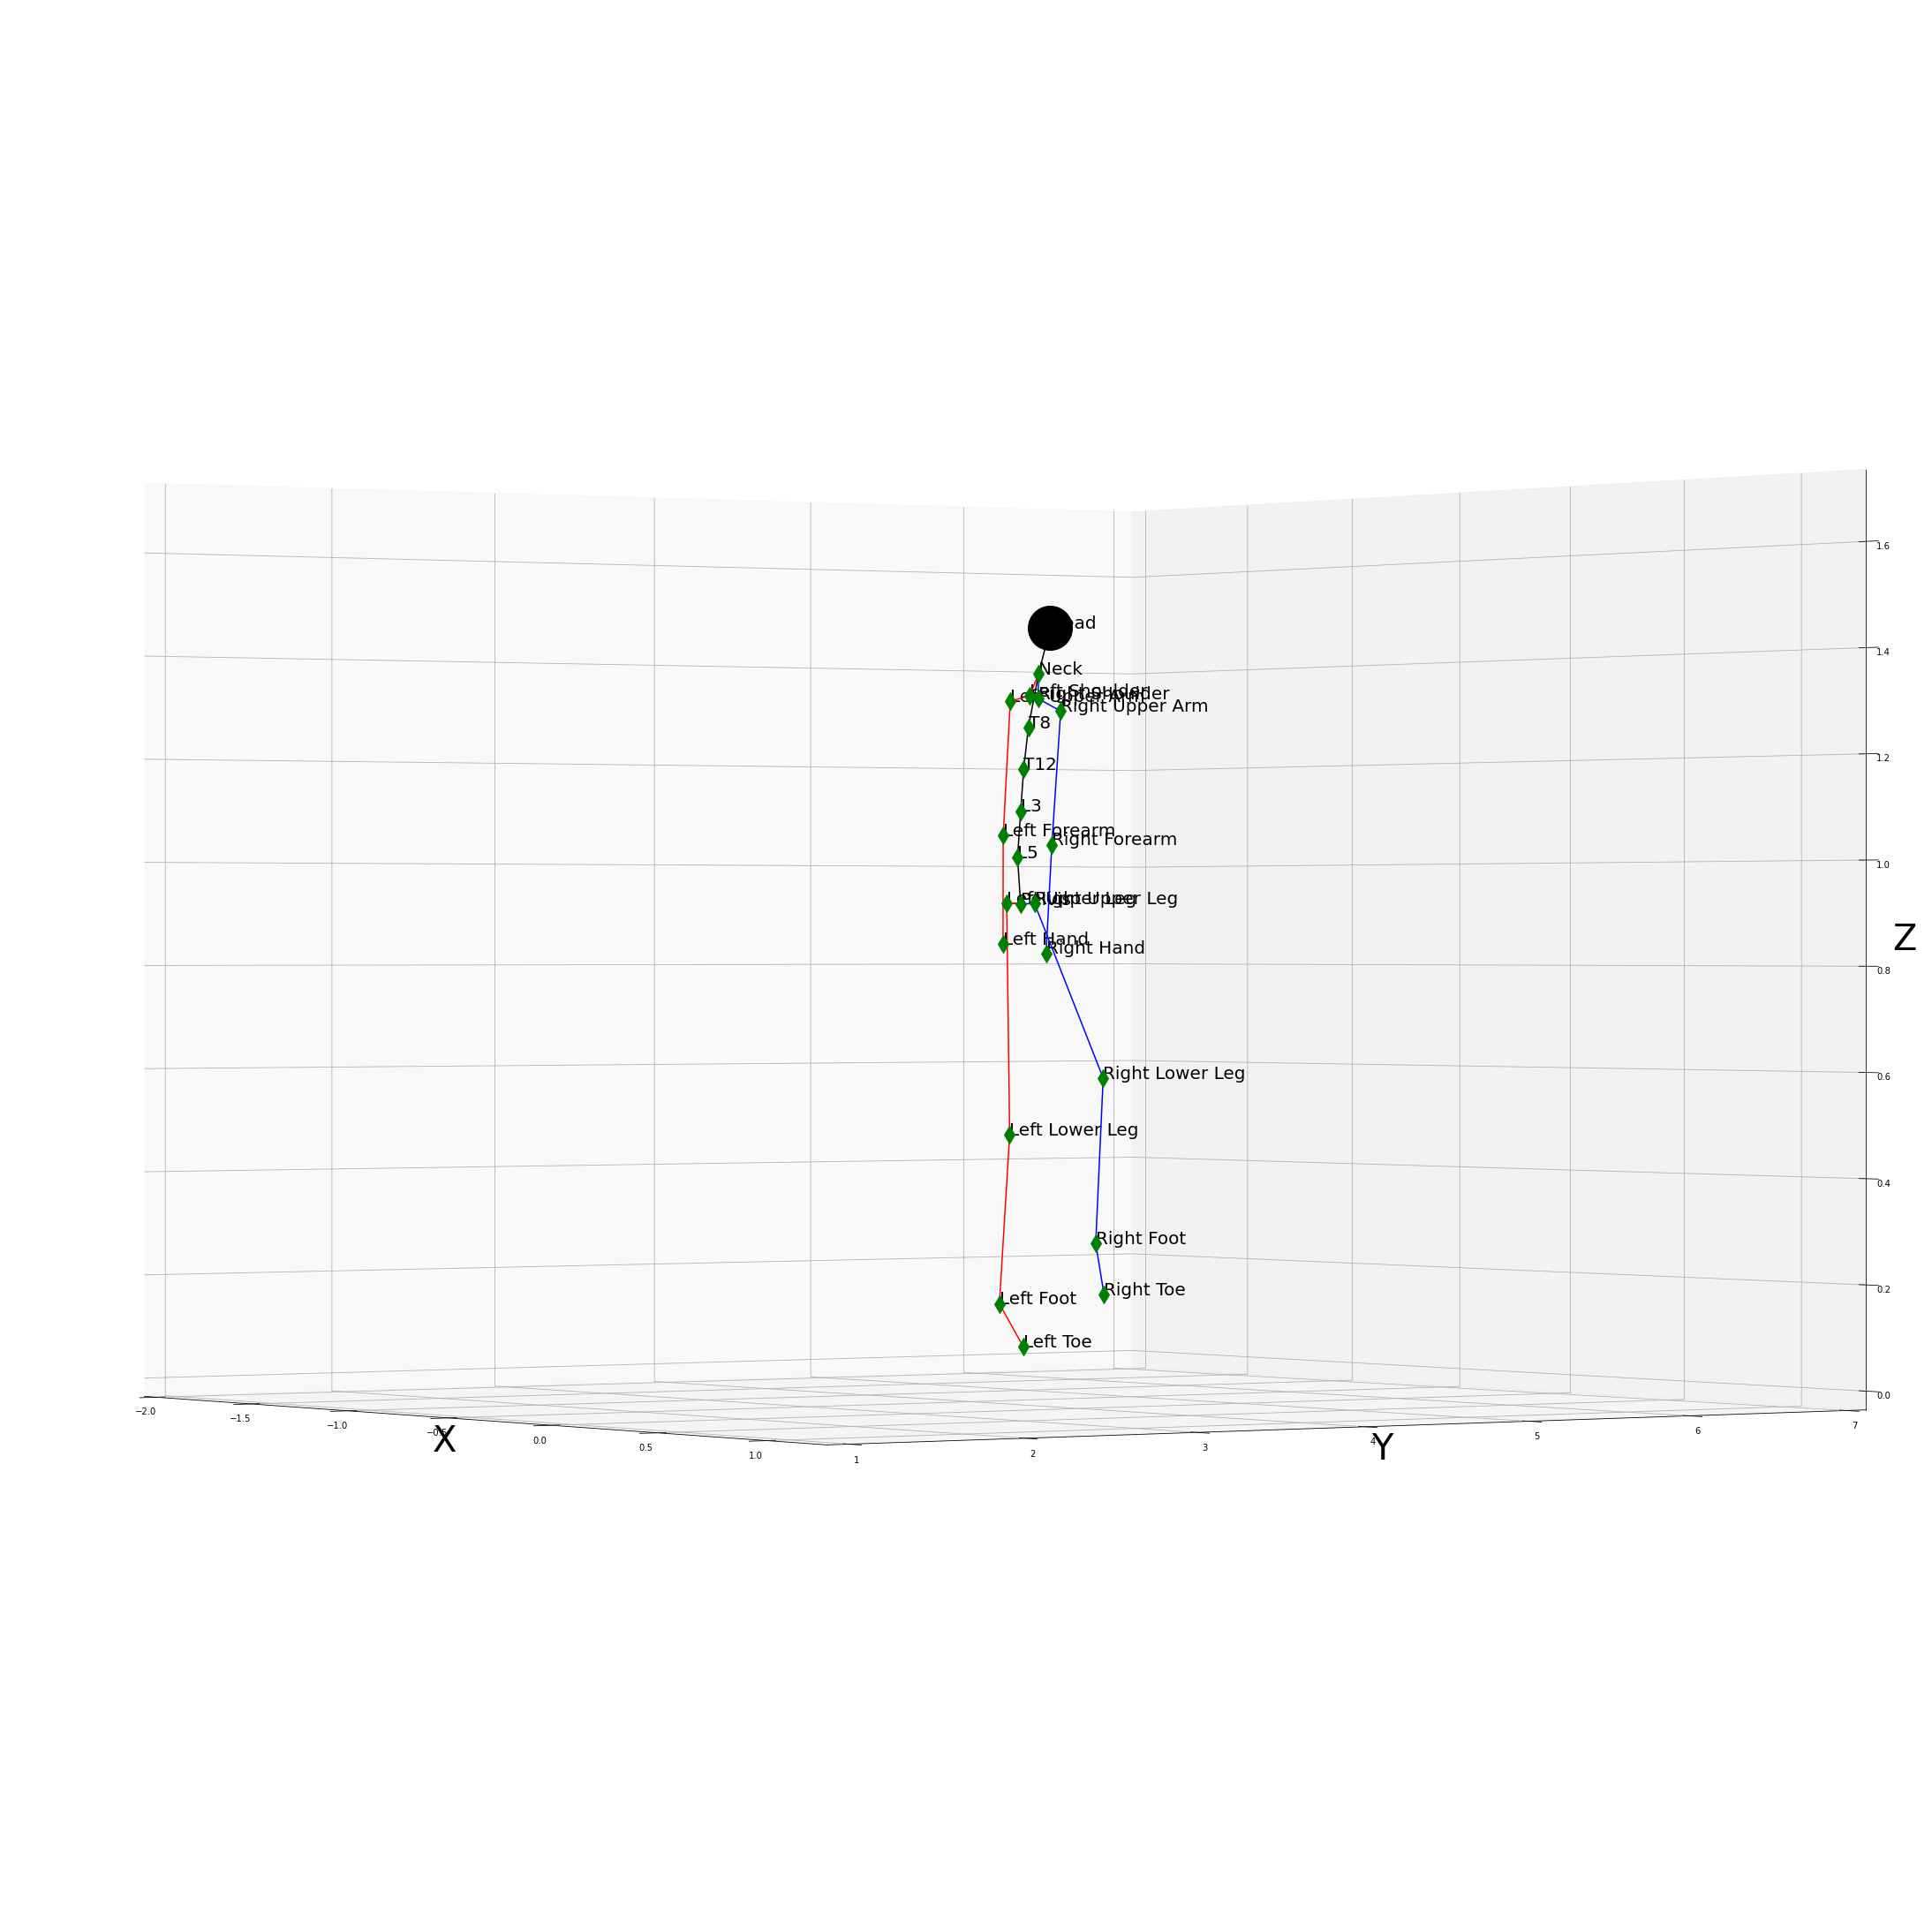

In [280]:
x_head = data.loc[:,'Head x'][1000]
y_head = data.loc[:,'Head y'][1000]
z_head = data.loc[:,'Head z'][1000]
ax3.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")
fig3

## Drawing the skeleton with the numbers of sensors :

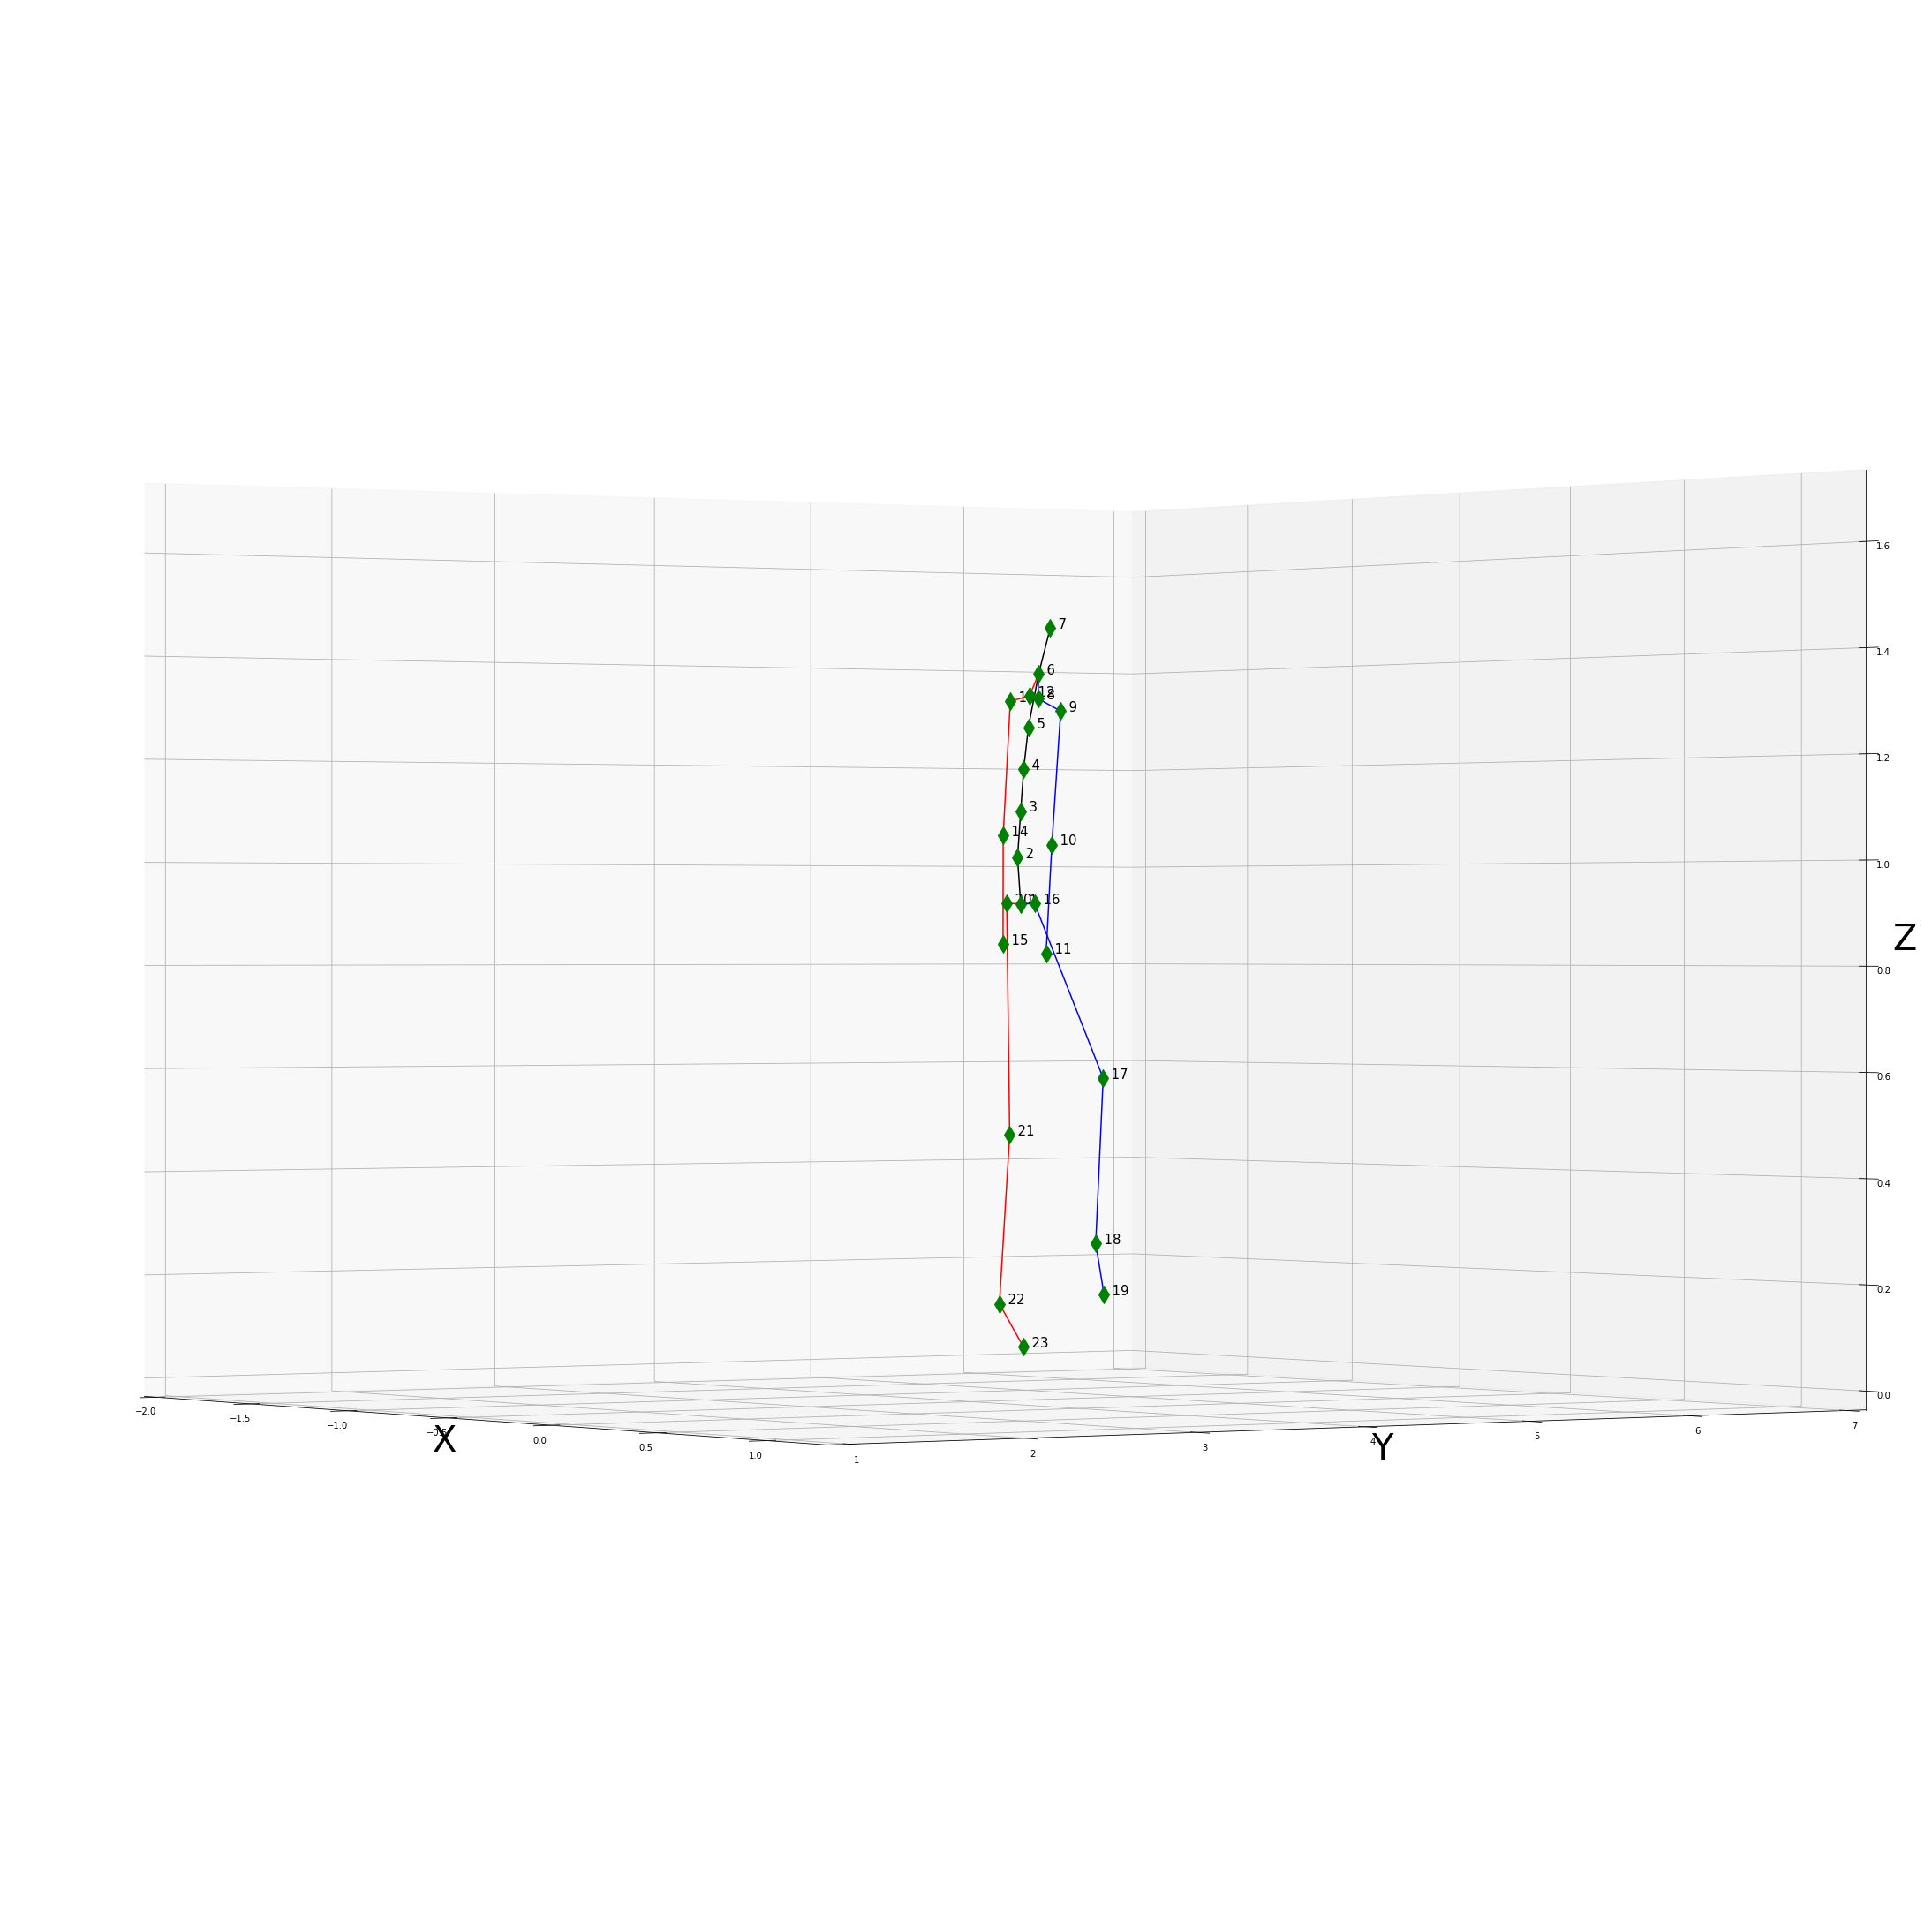

In [281]:
fig4, ax4 = new_figure()
plot_all_sensors_with_numbers(df2,ax4)
plot_all_segments(df2,ax4)
ax4.view_init(0, -35)
ax4.quiver(0,0,0,0,0.0000001,0,length=1.0)

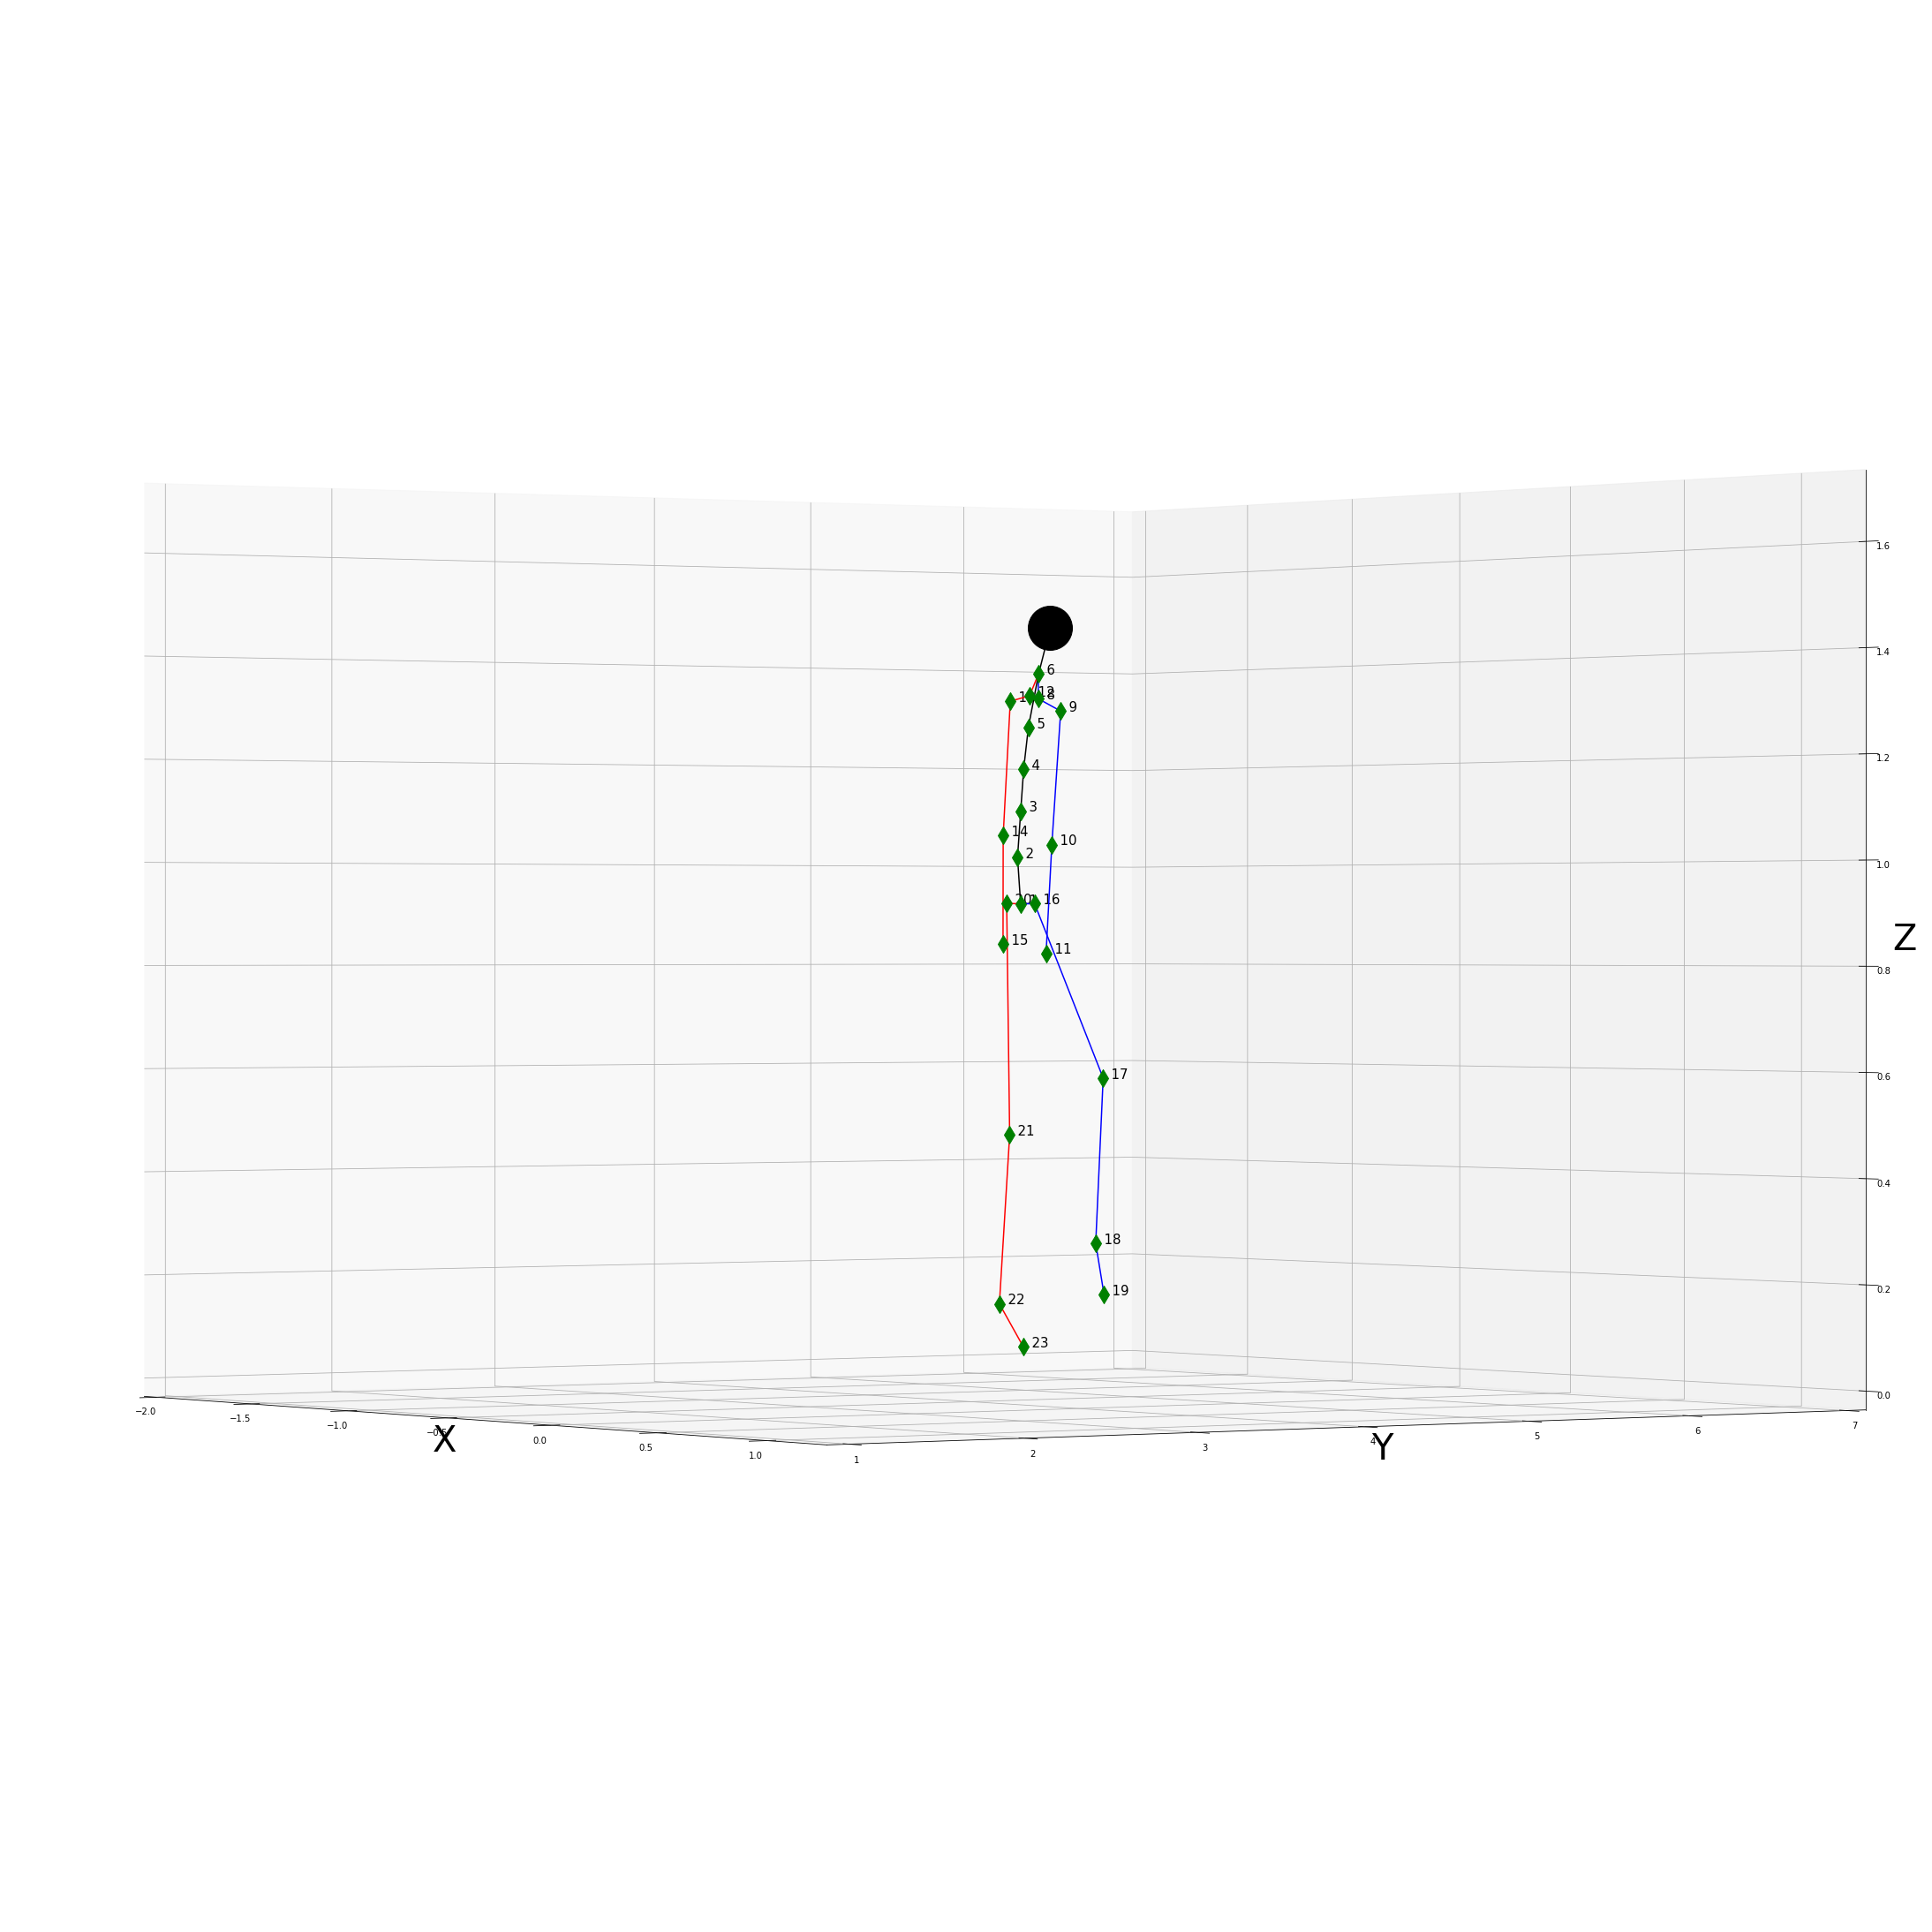

In [282]:
x_head = data.loc[:,'Head x'][1000]
y_head = data.loc[:,'Head y'][1000]
z_head = data.loc[:,'Head z'][1000]
ax4.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")
fig4

# Extracting data for time = 2500 :

In [283]:
l=data.shape[1]
datax=[]; datay=[]; dataz=[]
for i in range (1,l,3):
    datax.append(data.loc[:,data.columns[i]][2500])  #extract all the x's from the first column and store them in datax list
    datay.append(data.loc[:,data.columns[i+1]][2500])  #extract all the y's from the first column and store them in datay list
    dataz.append(data.loc[:,data.columns[i+2]][2500])  #extract all the z's from the first column and store them in dataz list

In [284]:
ar3=np.array([datax,datay,dataz])
ar3

array([[-1.22390137, -1.22565113, -1.22867129, -1.23128739, -1.2342533 ,
        -1.23941244, -1.23011049, -1.26122839, -1.3820277 , -1.37516554,
        -1.37228727, -1.21293799, -1.09185107, -1.08899795, -1.07823175,
        -1.30253336, -1.28199975, -1.27196074, -1.23481341, -1.14531332,
        -1.16127731, -1.18368639, -1.19062133],
       [ 4.76166719,  4.78829103,  4.79144472,  4.79802514,  4.79926407,
         4.78321506,  4.75579467,  4.79259374,  4.79562677,  4.81524783,
         4.82439131,  4.78950284,  4.77741942,  4.79857211,  4.83061934,
         4.76508137,  4.7624094 ,  4.81207388,  4.65497279,  4.75893145,
         4.73887635,  4.76112412,  4.60483054],
       [ 0.92809139,  1.01817799,  1.11057749,  1.19480295,  1.27916981,
         1.39285985,  1.4895086 ,  1.3422755 ,  1.31922006,  1.05100995,
         0.83337337,  1.34402997,  1.32598959,  1.05782396,  0.84261551,
         0.92678598,  0.46637113,  0.12600512,  0.04171327,  0.93165375,
         0.47149768,  0.1288

In [285]:
df3 = pd.DataFrame(ar3, index = ['x', 'y', 'z'], columns = ['Pelvis','L5','L3','T12','T8','Neck','Head','Right Shoulder','Right Upper Arm','Right Forearm','Right Hand','Left Shoulder','Left Upper Arm','Left Forearm','Left Hand','Right Upper Leg','Right Lower Leg','Right Foot','Right Toe','Left Upper Leg','Left Lower Leg','Left Foot','Left Toe'])
df3

,Pelvis,L5,L3,T12,T8,Neck,Head,Right Shoulder,Right Upper Arm,Right Forearm,...,Left Forearm,Left Hand,Right Upper Leg,Right Lower Leg,Right Foot,Right Toe,Left Upper Leg,Left Lower Leg,Left Foot,Left Toe
x,-1.223901,-1.225651,-1.228671,-1.231287,-1.234253,-1.239412,-1.230110,-1.261228,-1.382028,-1.375166,...,-1.088998,-1.078232,-1.302533,-1.282000,-1.271961,-1.234813,-1.145313,-1.161277,-1.183686,-1.190621
y,4.761667,4.788291,4.791445,4.798025,4.799264,4.783215,4.755795,4.792594,4.795627,4.815248,...,4.798572,4.830619,4.765081,4.762409,4.812074,4.654973,4.758931,4.738876,4.761124,4.604831
z,0.928091,1.018178,1.110577,1.194803,1.279170,1.392860,1.489509,1.342276,1.319220,1.051010,...,1.057824,0.842616,0.926786,0.466371,0.126005,0.041713,0.931654,0.471498,0.128841,0.041463


In [286]:
new_df3 = df3.transpose()
new_df3

,x,y,z
Pelvis,-1.223901,4.761667,0.928091
L5,-1.225651,4.788291,1.018178
L3,-1.228671,4.791445,1.110577
T12,-1.231287,4.798025,1.194803
T8,-1.234253,4.799264,1.279170
Neck,-1.239412,4.783215,1.392860
Head,-1.230110,4.755795,1.489509
Right Shoulder,-1.261228,4.792594,1.342276
Right Upper Arm,-1.382028,4.795627,1.319220
Right Forearm,-1.375166,4.815248,1.051010


In [287]:
new_df3.describe()

,x,y,z
count,23.000000,23.000000,23.000000
mean,-1.228184,4.772173,0.898429
std,0.083429,0.051082,0.463507
min,-1.382028,4.604831,0.041463
25%,-1.266595,4.761396,0.652436
50%,-1.230110,4.788291,1.018178
75%,-1.187154,4.798299,1.299195
max,-1.078232,4.830619,1.489509


# Visualizing data for time = 2500 :

## Drawing the skeleton with the names of the sensors :

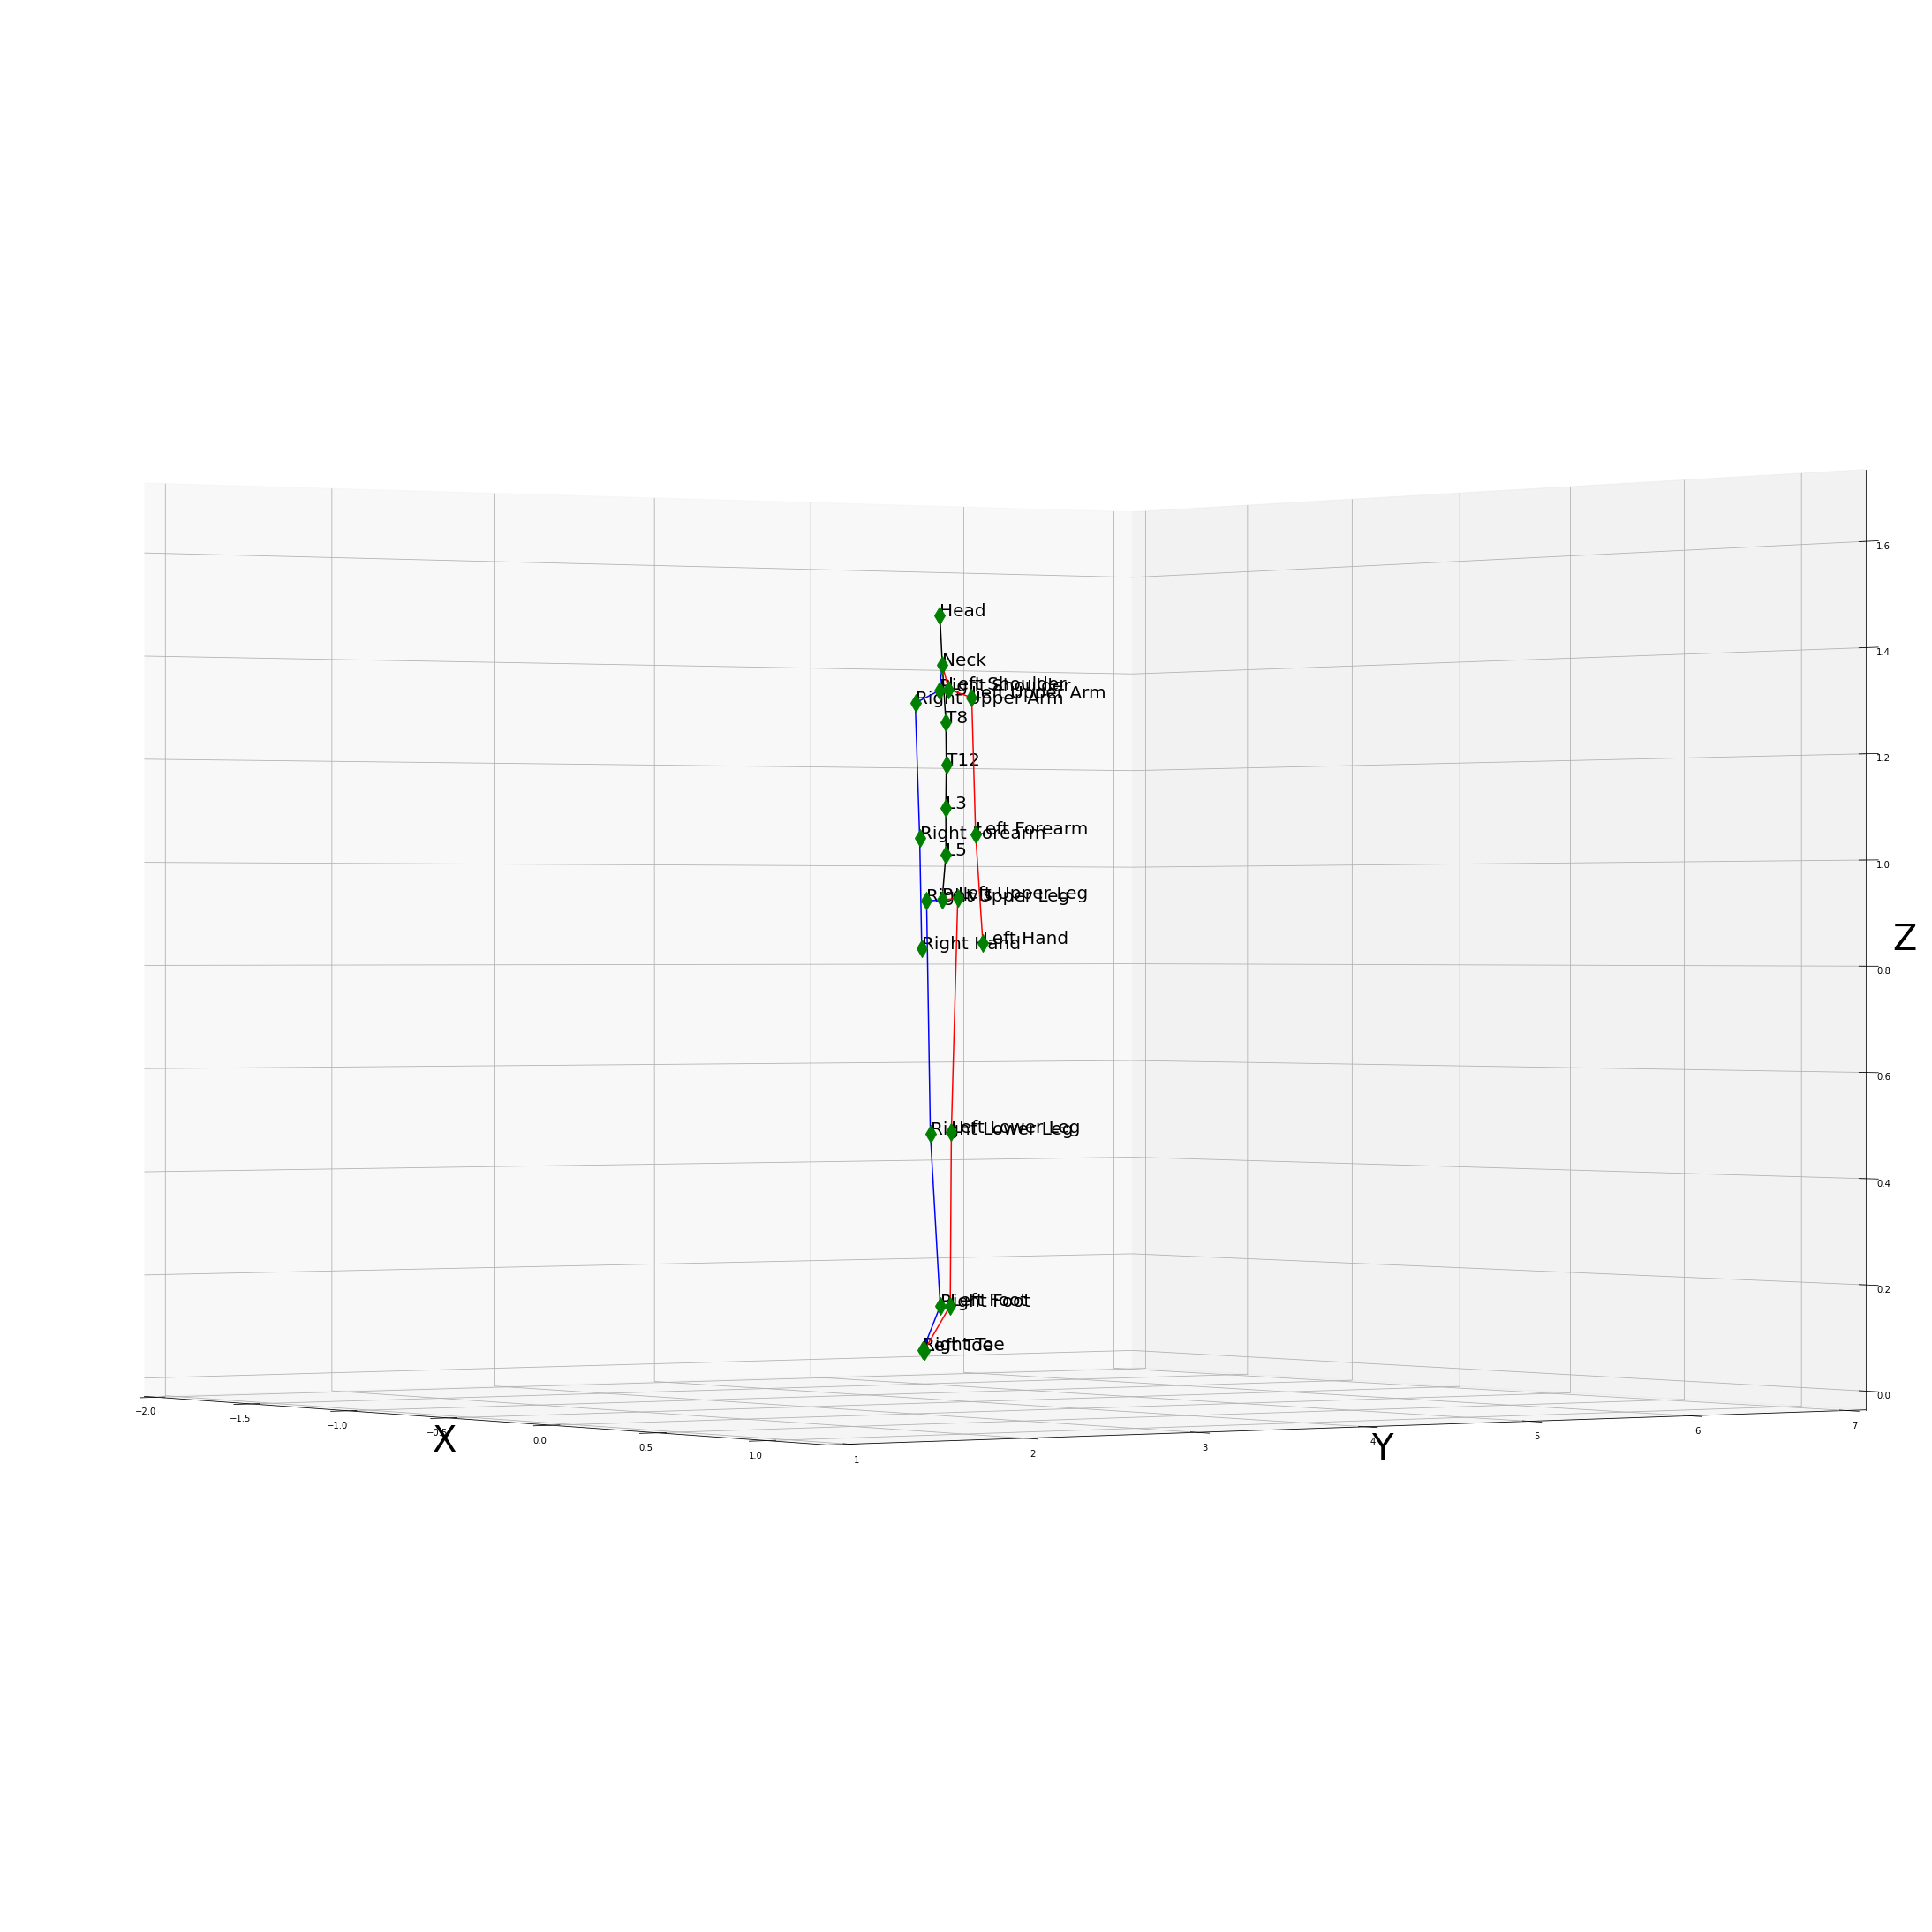

In [288]:
fig5, ax5 = new_figure()
plot_all_sensors_with_names (df3,ax5)
plot_all_segments(df3,ax5)
ax5.view_init(0, -35)
ax5.quiver(0,0,0,0,0.0000001,0,length=1.0)

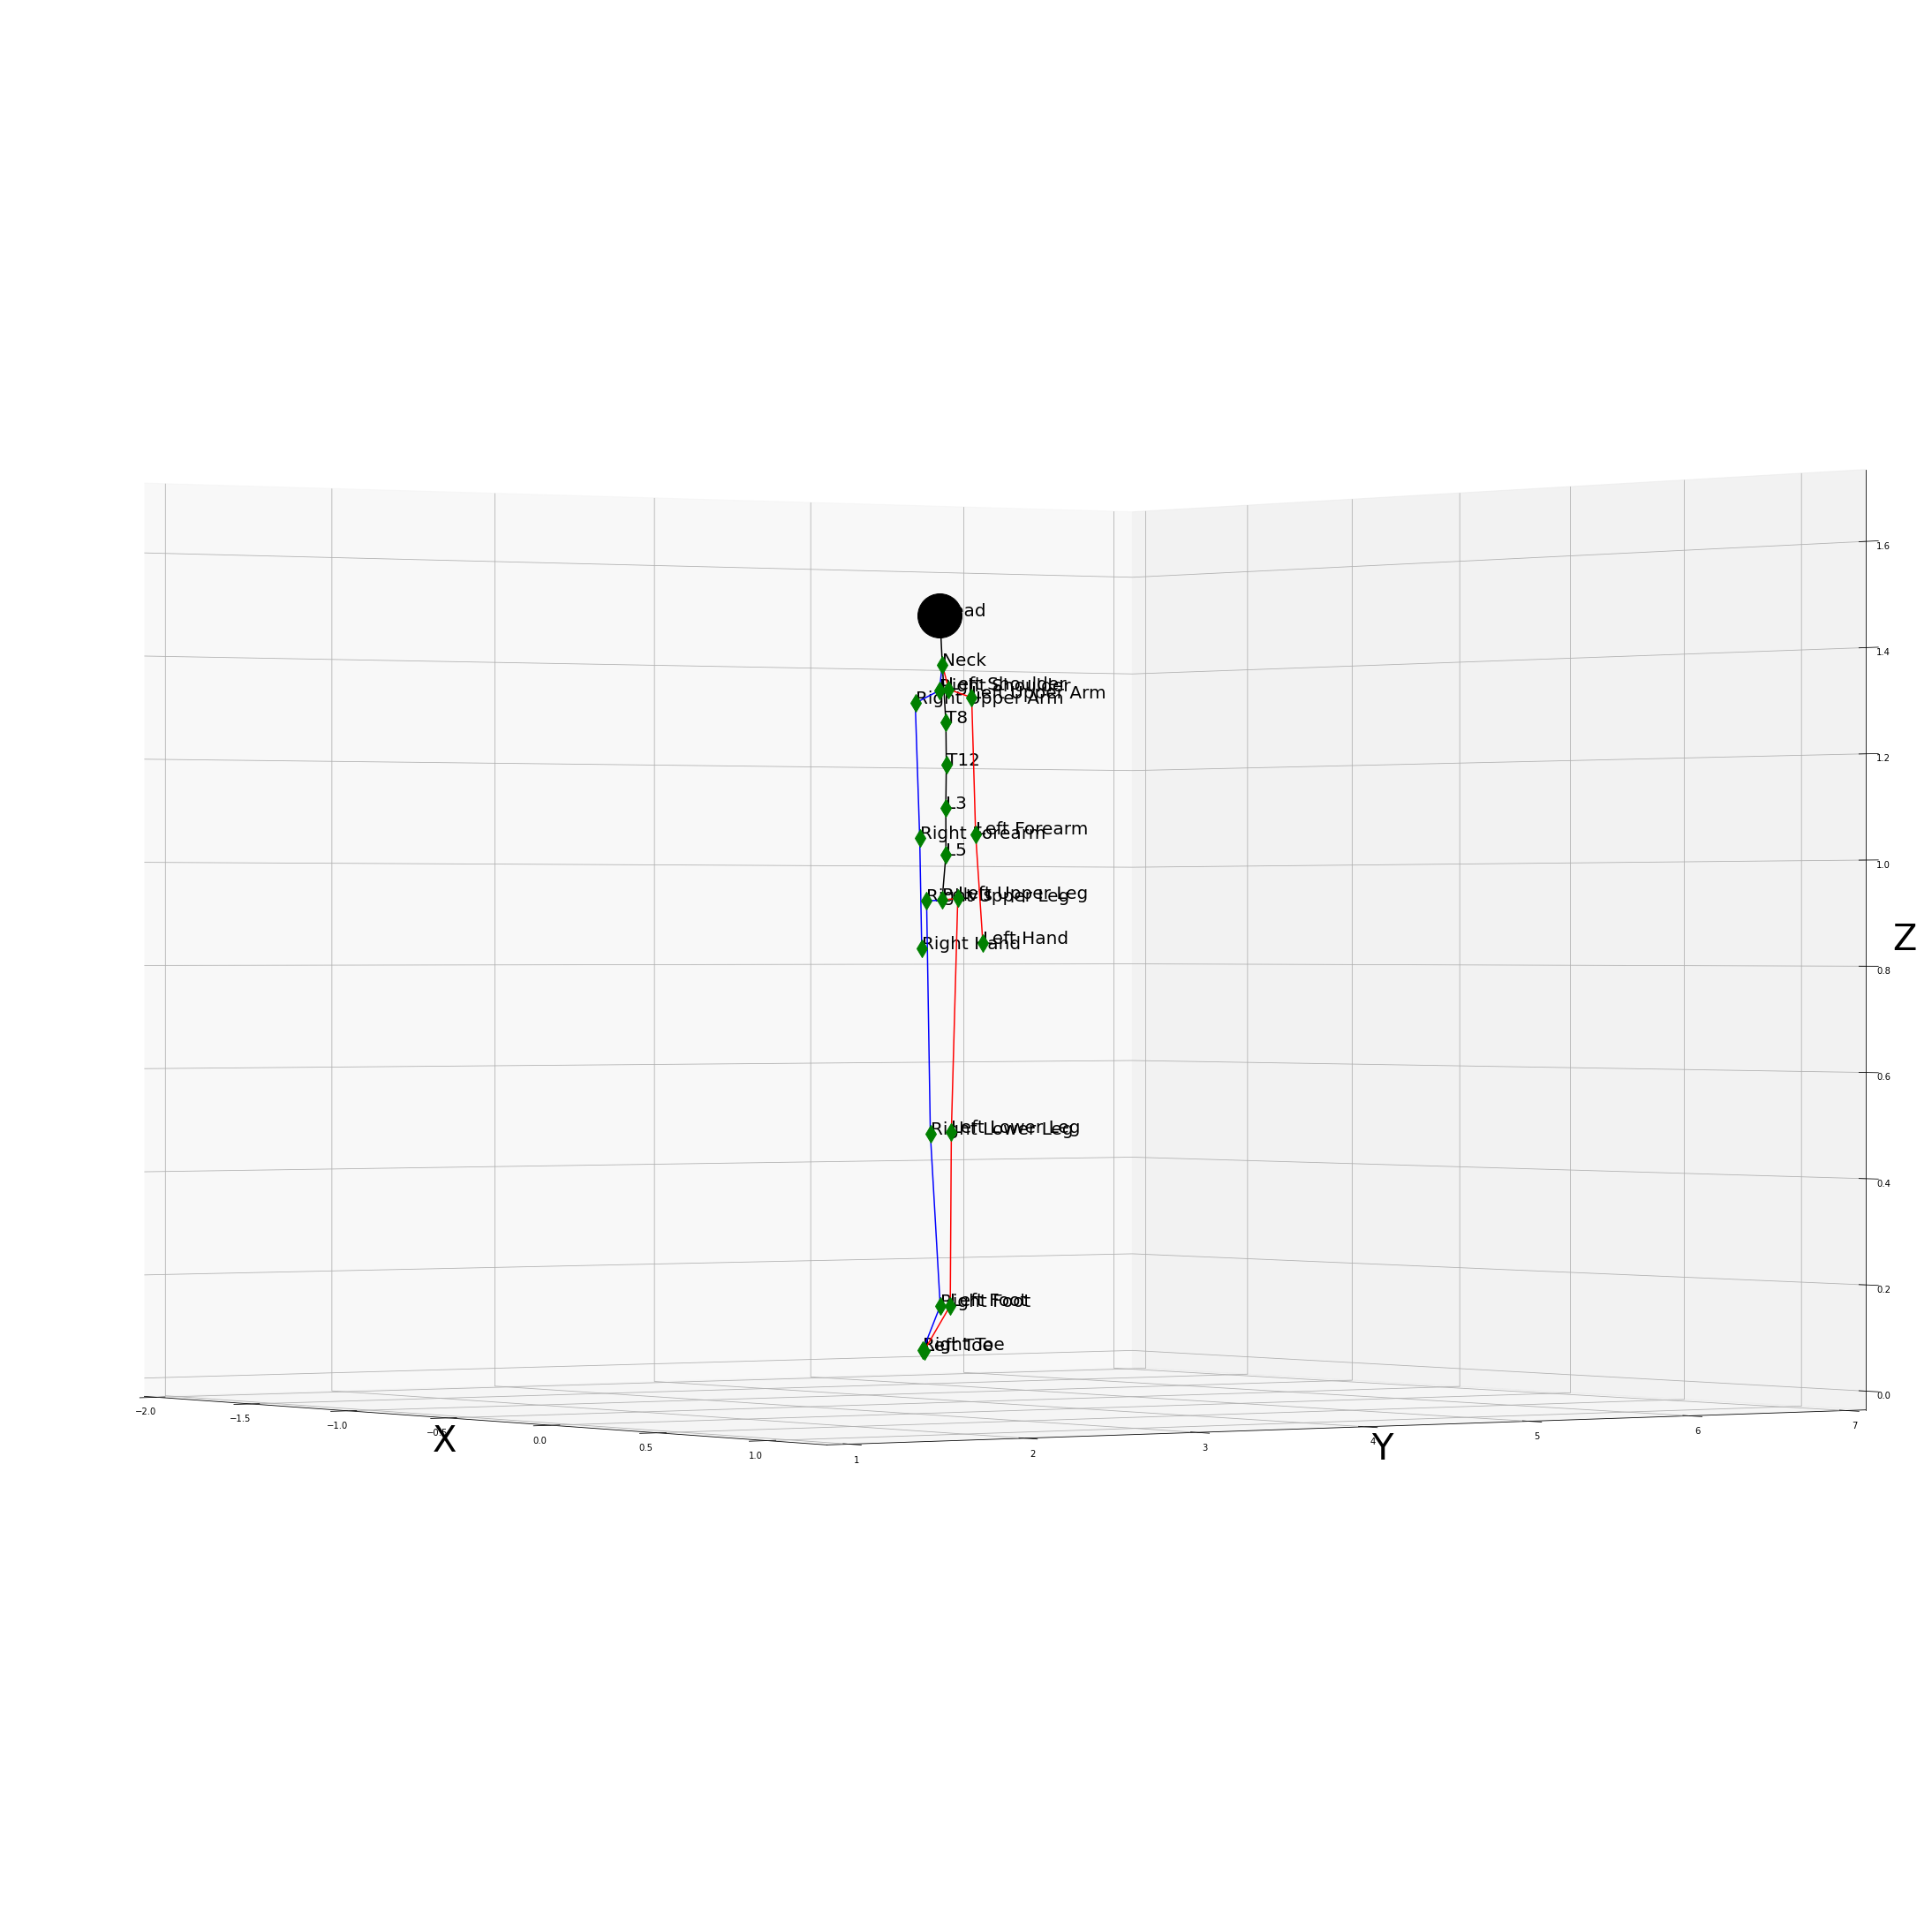

In [289]:
x_head = data.loc[:,'Head x'][2500]
y_head = data.loc[:,'Head y'][2500]
z_head = data.loc[:,'Head z'][2500]
ax5.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")
fig5

## Drawing the skeleton with the numbers of sensors :

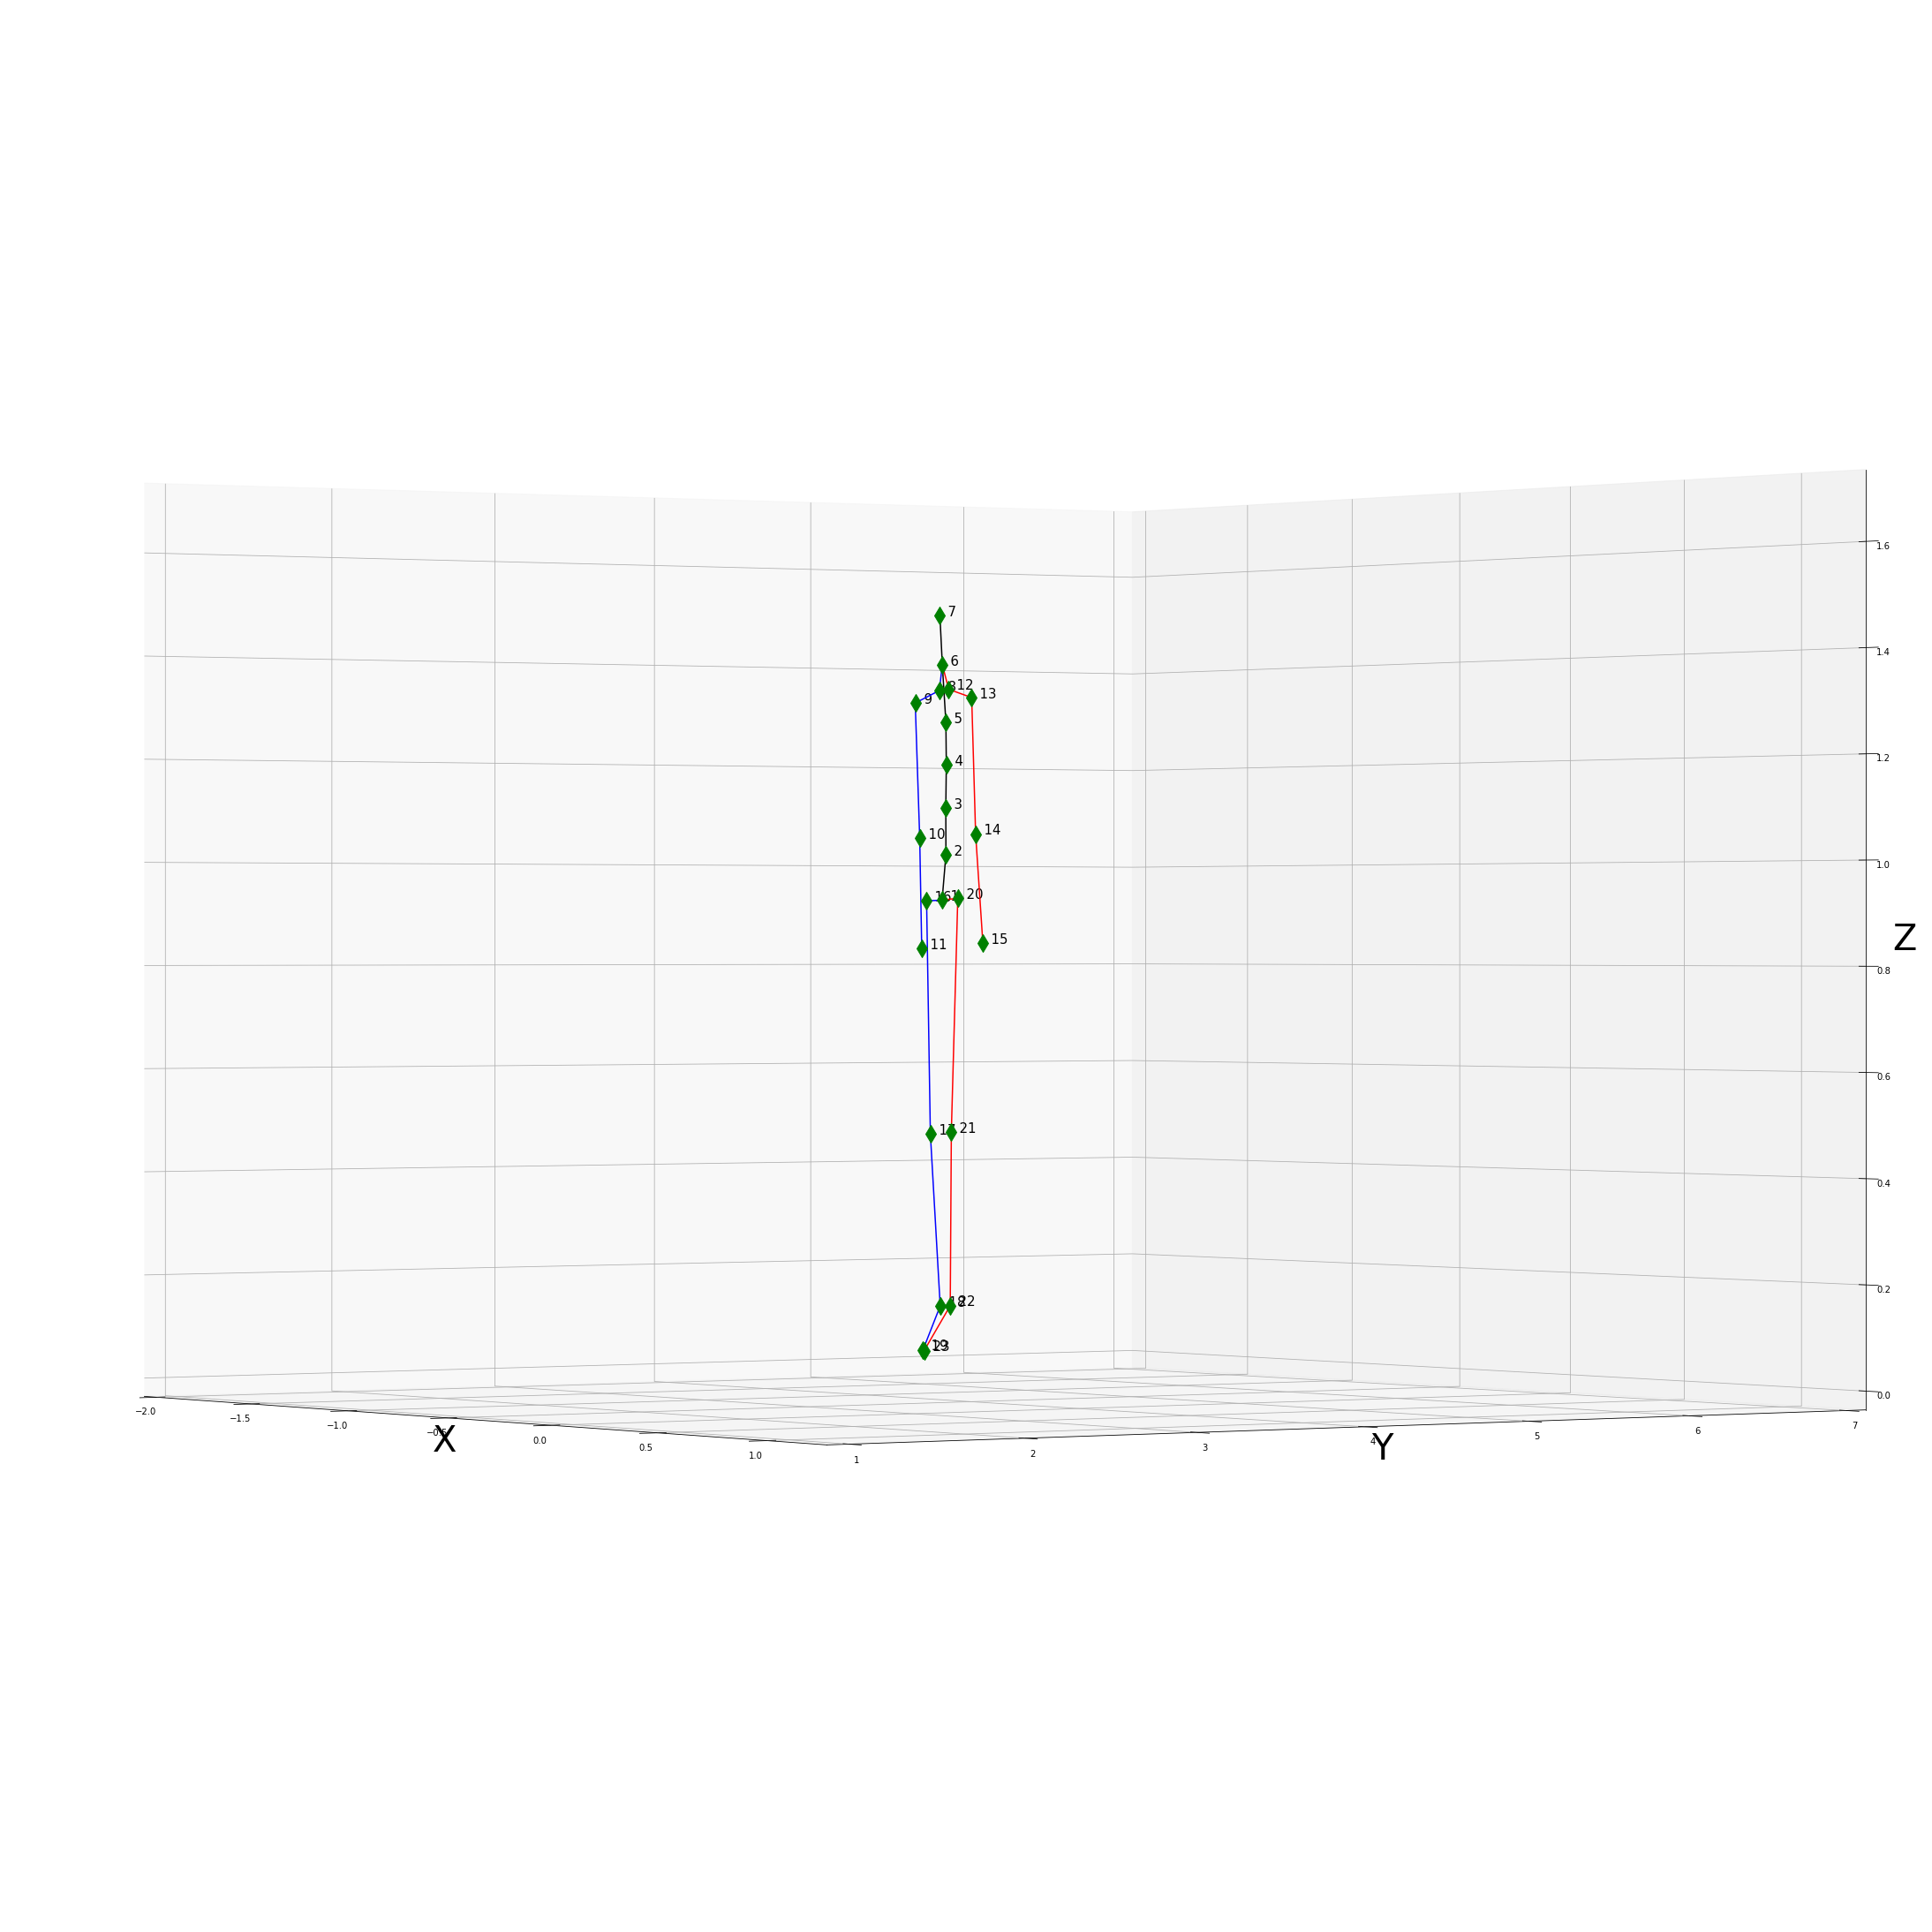

In [290]:
fig6, ax6 = new_figure()
plot_all_sensors_with_numbers(df3,ax6)
plot_all_segments(df3,ax6)
ax6.view_init(0, -35)
ax6.quiver(0,0,0,0,0.0000001,0,length=1.0)

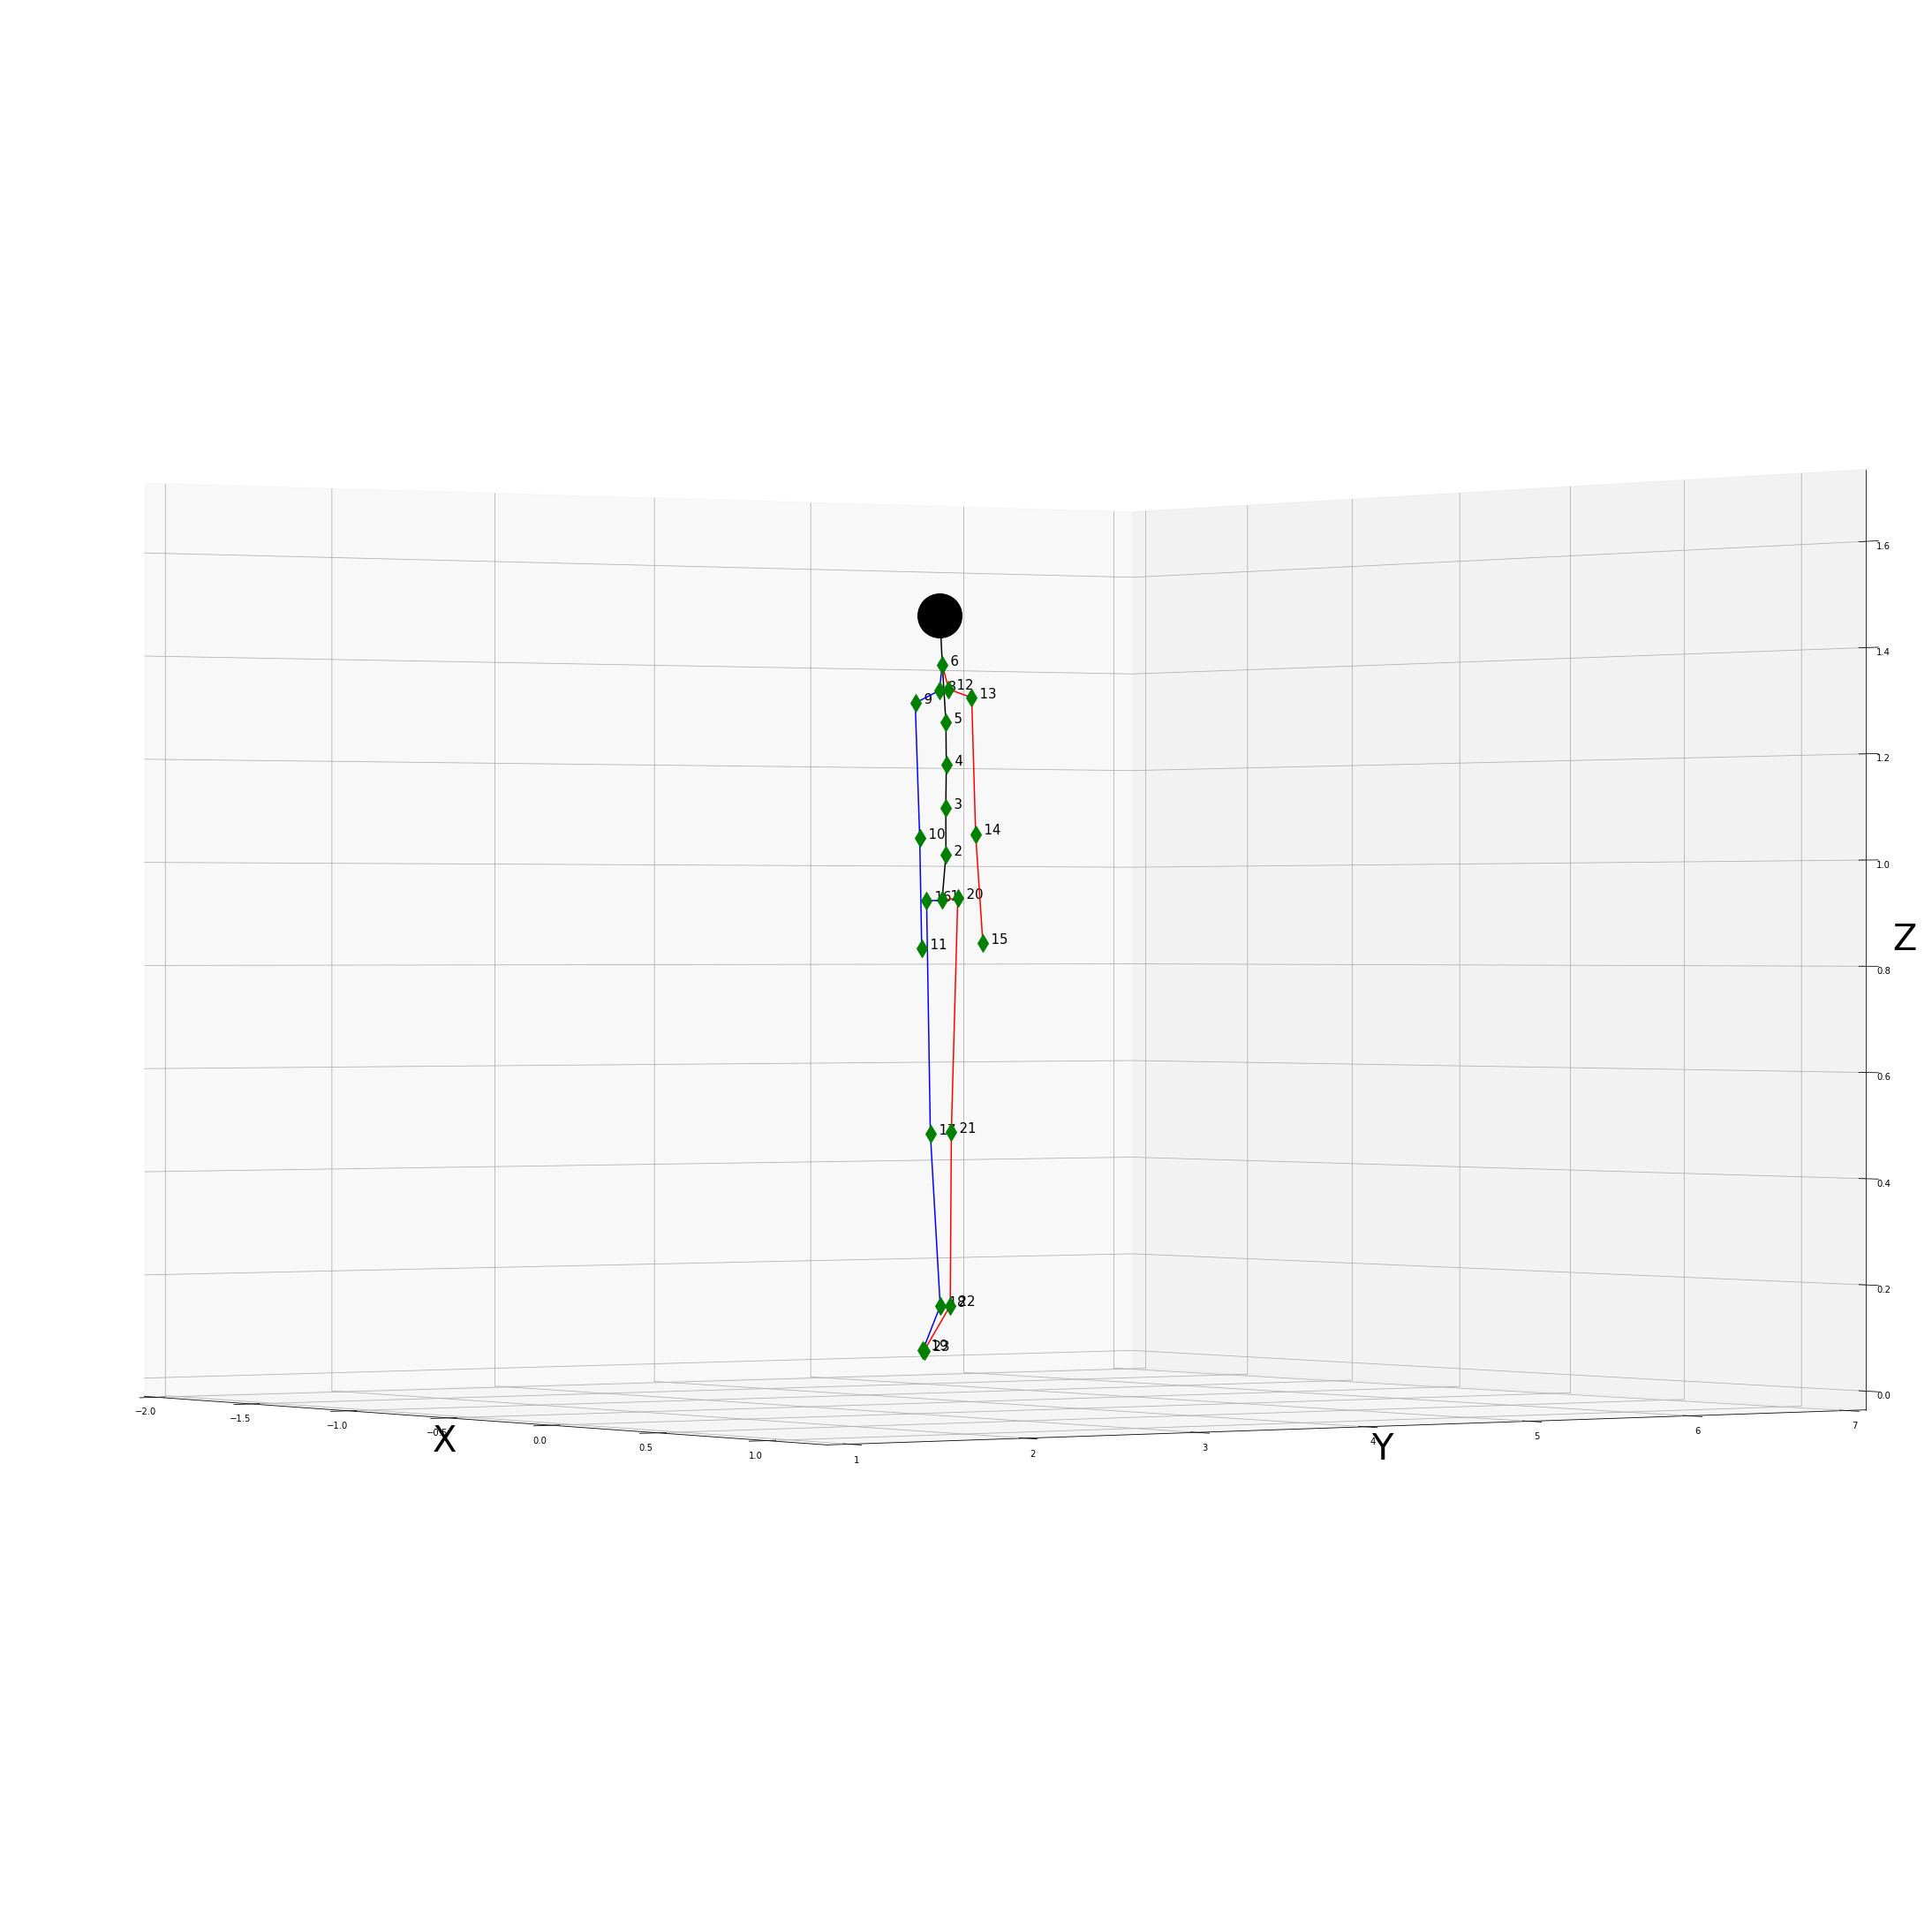

In [291]:
x_head = data.loc[:,'Head x'][2500]
y_head = data.loc[:,'Head y'][2500]
z_head = data.loc[:,'Head z'][2500]
ax6.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")
fig6

# Extracting data for time = 4653 :

In [292]:
l=data.shape[1]
datax=[]; datay=[]; dataz=[]
for i in range (1,l,3):
    datax.append(data.loc[:,data.columns[i]][4653])  #extract all the x's from the first column and store them in datax list
    datay.append(data.loc[:,data.columns[i+1]][4653])  #extract all the y's from the first column and store them in datay list
    dataz.append(data.loc[:,data.columns[i+2]][4653])  #extract all the z's from the first column and store them in dataz list

In [293]:
ar4=np.array([datax,datay,dataz])
ar4

array([[0.70133384, 0.67308066, 0.67197157, 0.66878071, 0.67246752,
        0.69669101, 0.73087724, 0.68525849, 0.68765973, 0.67600545,
        0.8778897 , 0.68494136, 0.69967668, 0.71957321, 0.73806309,
        0.69407417, 0.84089034, 0.66258789, 0.7342958 , 0.70784856,
        0.73634575, 0.68807242, 0.84617598],
       [1.91185005, 1.91017477, 1.90644462, 1.90305225, 1.89940651,
        1.89448736, 1.8929934 , 1.87214675, 1.75077795, 1.71574736,
        1.7717587 , 1.9205095 , 2.04137366, 2.05592115, 2.0853699 ,
        1.83351876, 1.73961911, 1.77807536, 1.81816414, 1.99016402,
        1.95264343, 1.93256217, 1.94697915],
       [0.92529425, 1.01488443, 1.10730507, 1.19169927, 1.27596801,
        1.38821174, 1.48312468, 1.33820776, 1.31824637, 1.05177501,
        0.99207014, 1.34042423, 1.32295556, 1.05509032, 0.84004443,
        0.92280744, 0.49616027, 0.20437789, 0.05668133, 0.93001276,
        0.47154611, 0.13141944, 0.04249559]])

In [294]:
df4 = pd.DataFrame(ar4, index = ['x', 'y', 'z'], columns = ['Pelvis','L5','L3','T12','T8','Neck','Head','Right Shoulder','Right Upper Arm','Right Forearm','Right Hand','Left Shoulder','Left Upper Arm','Left Forearm','Left Hand','Right Upper Leg','Right Lower Leg','Right Foot','Right Toe','Left Upper Leg','Left Lower Leg','Left Foot','Left Toe'])
df4

,Pelvis,L5,L3,T12,T8,Neck,Head,Right Shoulder,Right Upper Arm,Right Forearm,...,Left Forearm,Left Hand,Right Upper Leg,Right Lower Leg,Right Foot,Right Toe,Left Upper Leg,Left Lower Leg,Left Foot,Left Toe
x,0.701334,0.673081,0.671972,0.668781,0.672468,0.696691,0.730877,0.685258,0.687660,0.676005,...,0.719573,0.738063,0.694074,0.840890,0.662588,0.734296,0.707849,0.736346,0.688072,0.846176
y,1.911850,1.910175,1.906445,1.903052,1.899407,1.894487,1.892993,1.872147,1.750778,1.715747,...,2.055921,2.085370,1.833519,1.739619,1.778075,1.818164,1.990164,1.952643,1.932562,1.946979
z,0.925294,1.014884,1.107305,1.191699,1.275968,1.388212,1.483125,1.338208,1.318246,1.051775,...,1.055090,0.840044,0.922807,0.496160,0.204378,0.056681,0.930013,0.471546,0.131419,0.042496


In [295]:
new_df4 = df4.transpose()
new_df4

,x,y,z
Pelvis,0.701334,1.911850,0.925294
L5,0.673081,1.910175,1.014884
L3,0.671972,1.906445,1.107305
T12,0.668781,1.903052,1.191699
T8,0.672468,1.899407,1.275968
Neck,0.696691,1.894487,1.388212
Head,0.730877,1.892993,1.483125
Right Shoulder,0.685258,1.872147,1.338208
Right Upper Arm,0.687660,1.750778,1.318246
Right Forearm,0.676005,1.715747,1.051775


In [296]:
new_df4.describe()

,x,y,z
count,23.000000,23.000000,23.000000
mean,0.717155,1.892337,0.908731
std,0.059331,0.099411,0.453675
min,0.662588,1.715747,0.042496
25%,0.680473,1.825841,0.668102
50%,0.696691,1.903052,1.014884
75%,0.732587,1.939771,1.297107
max,0.877890,2.085370,1.483125


## Drawing the skeleton with the names of the sensors :

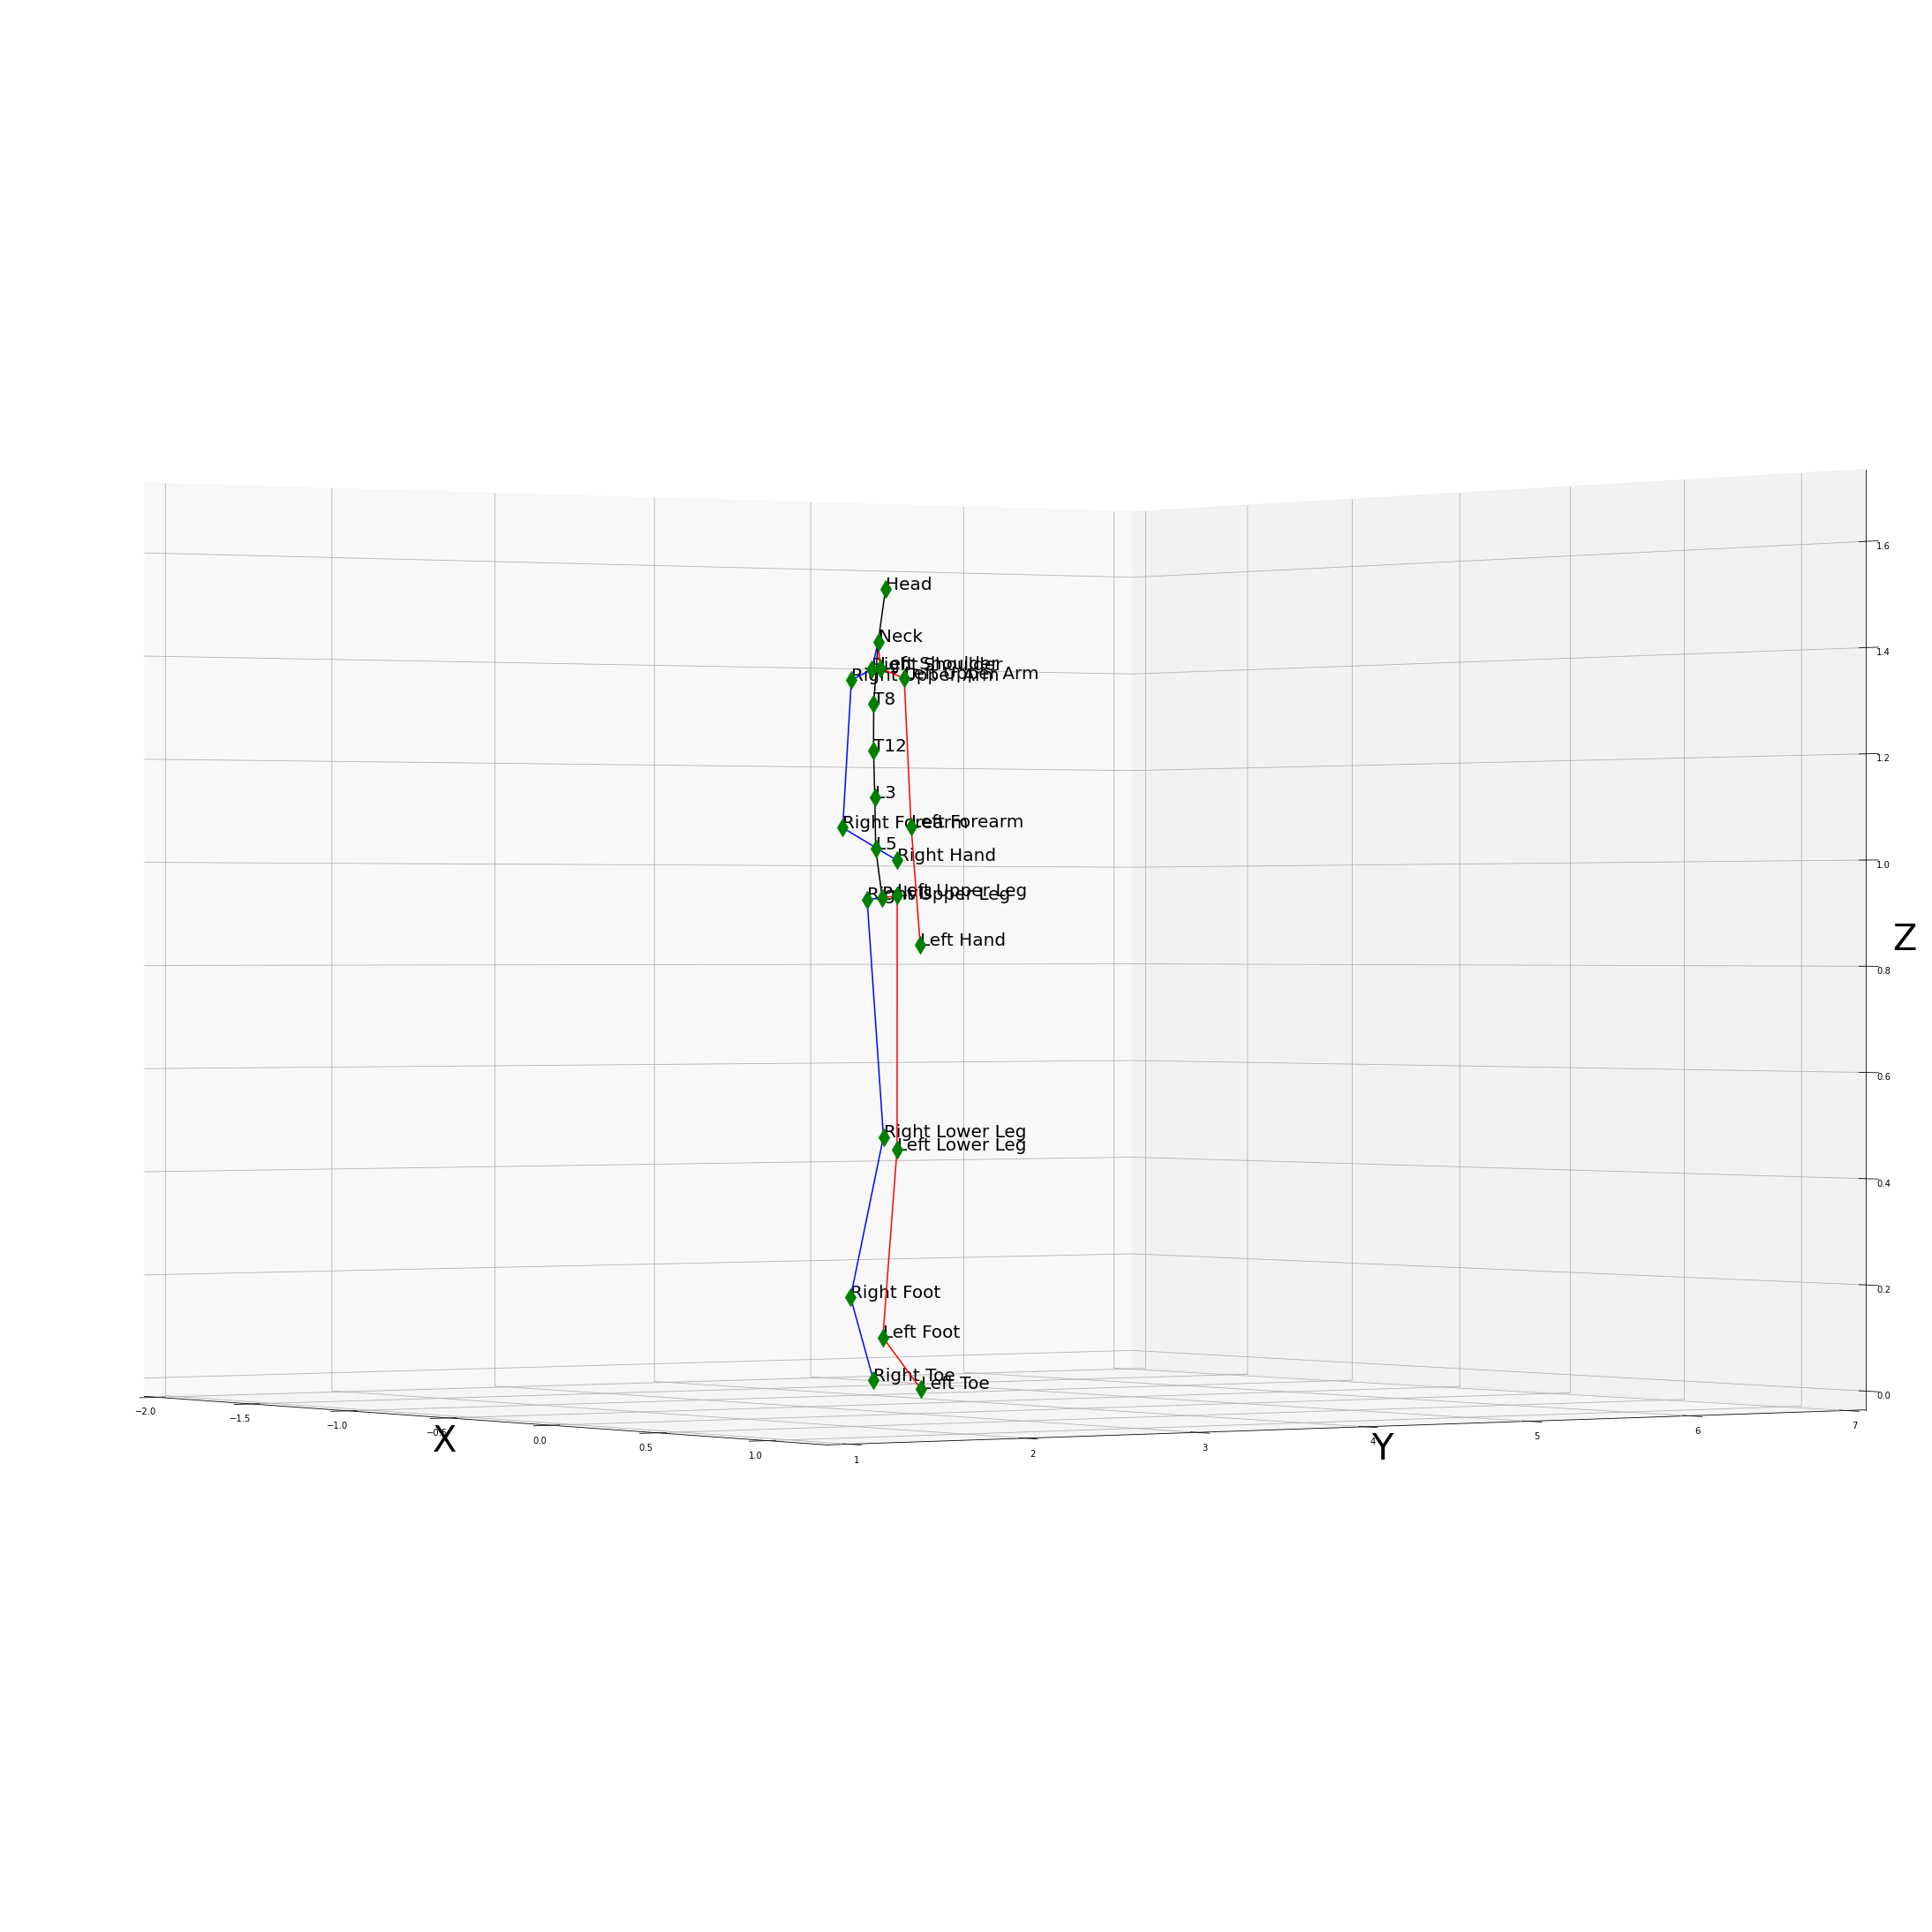

In [297]:
fig7, ax7 = new_figure()
plot_all_sensors_with_names (df4,ax7)
plot_all_segments(df4,ax7)
ax7.view_init(0, -35)

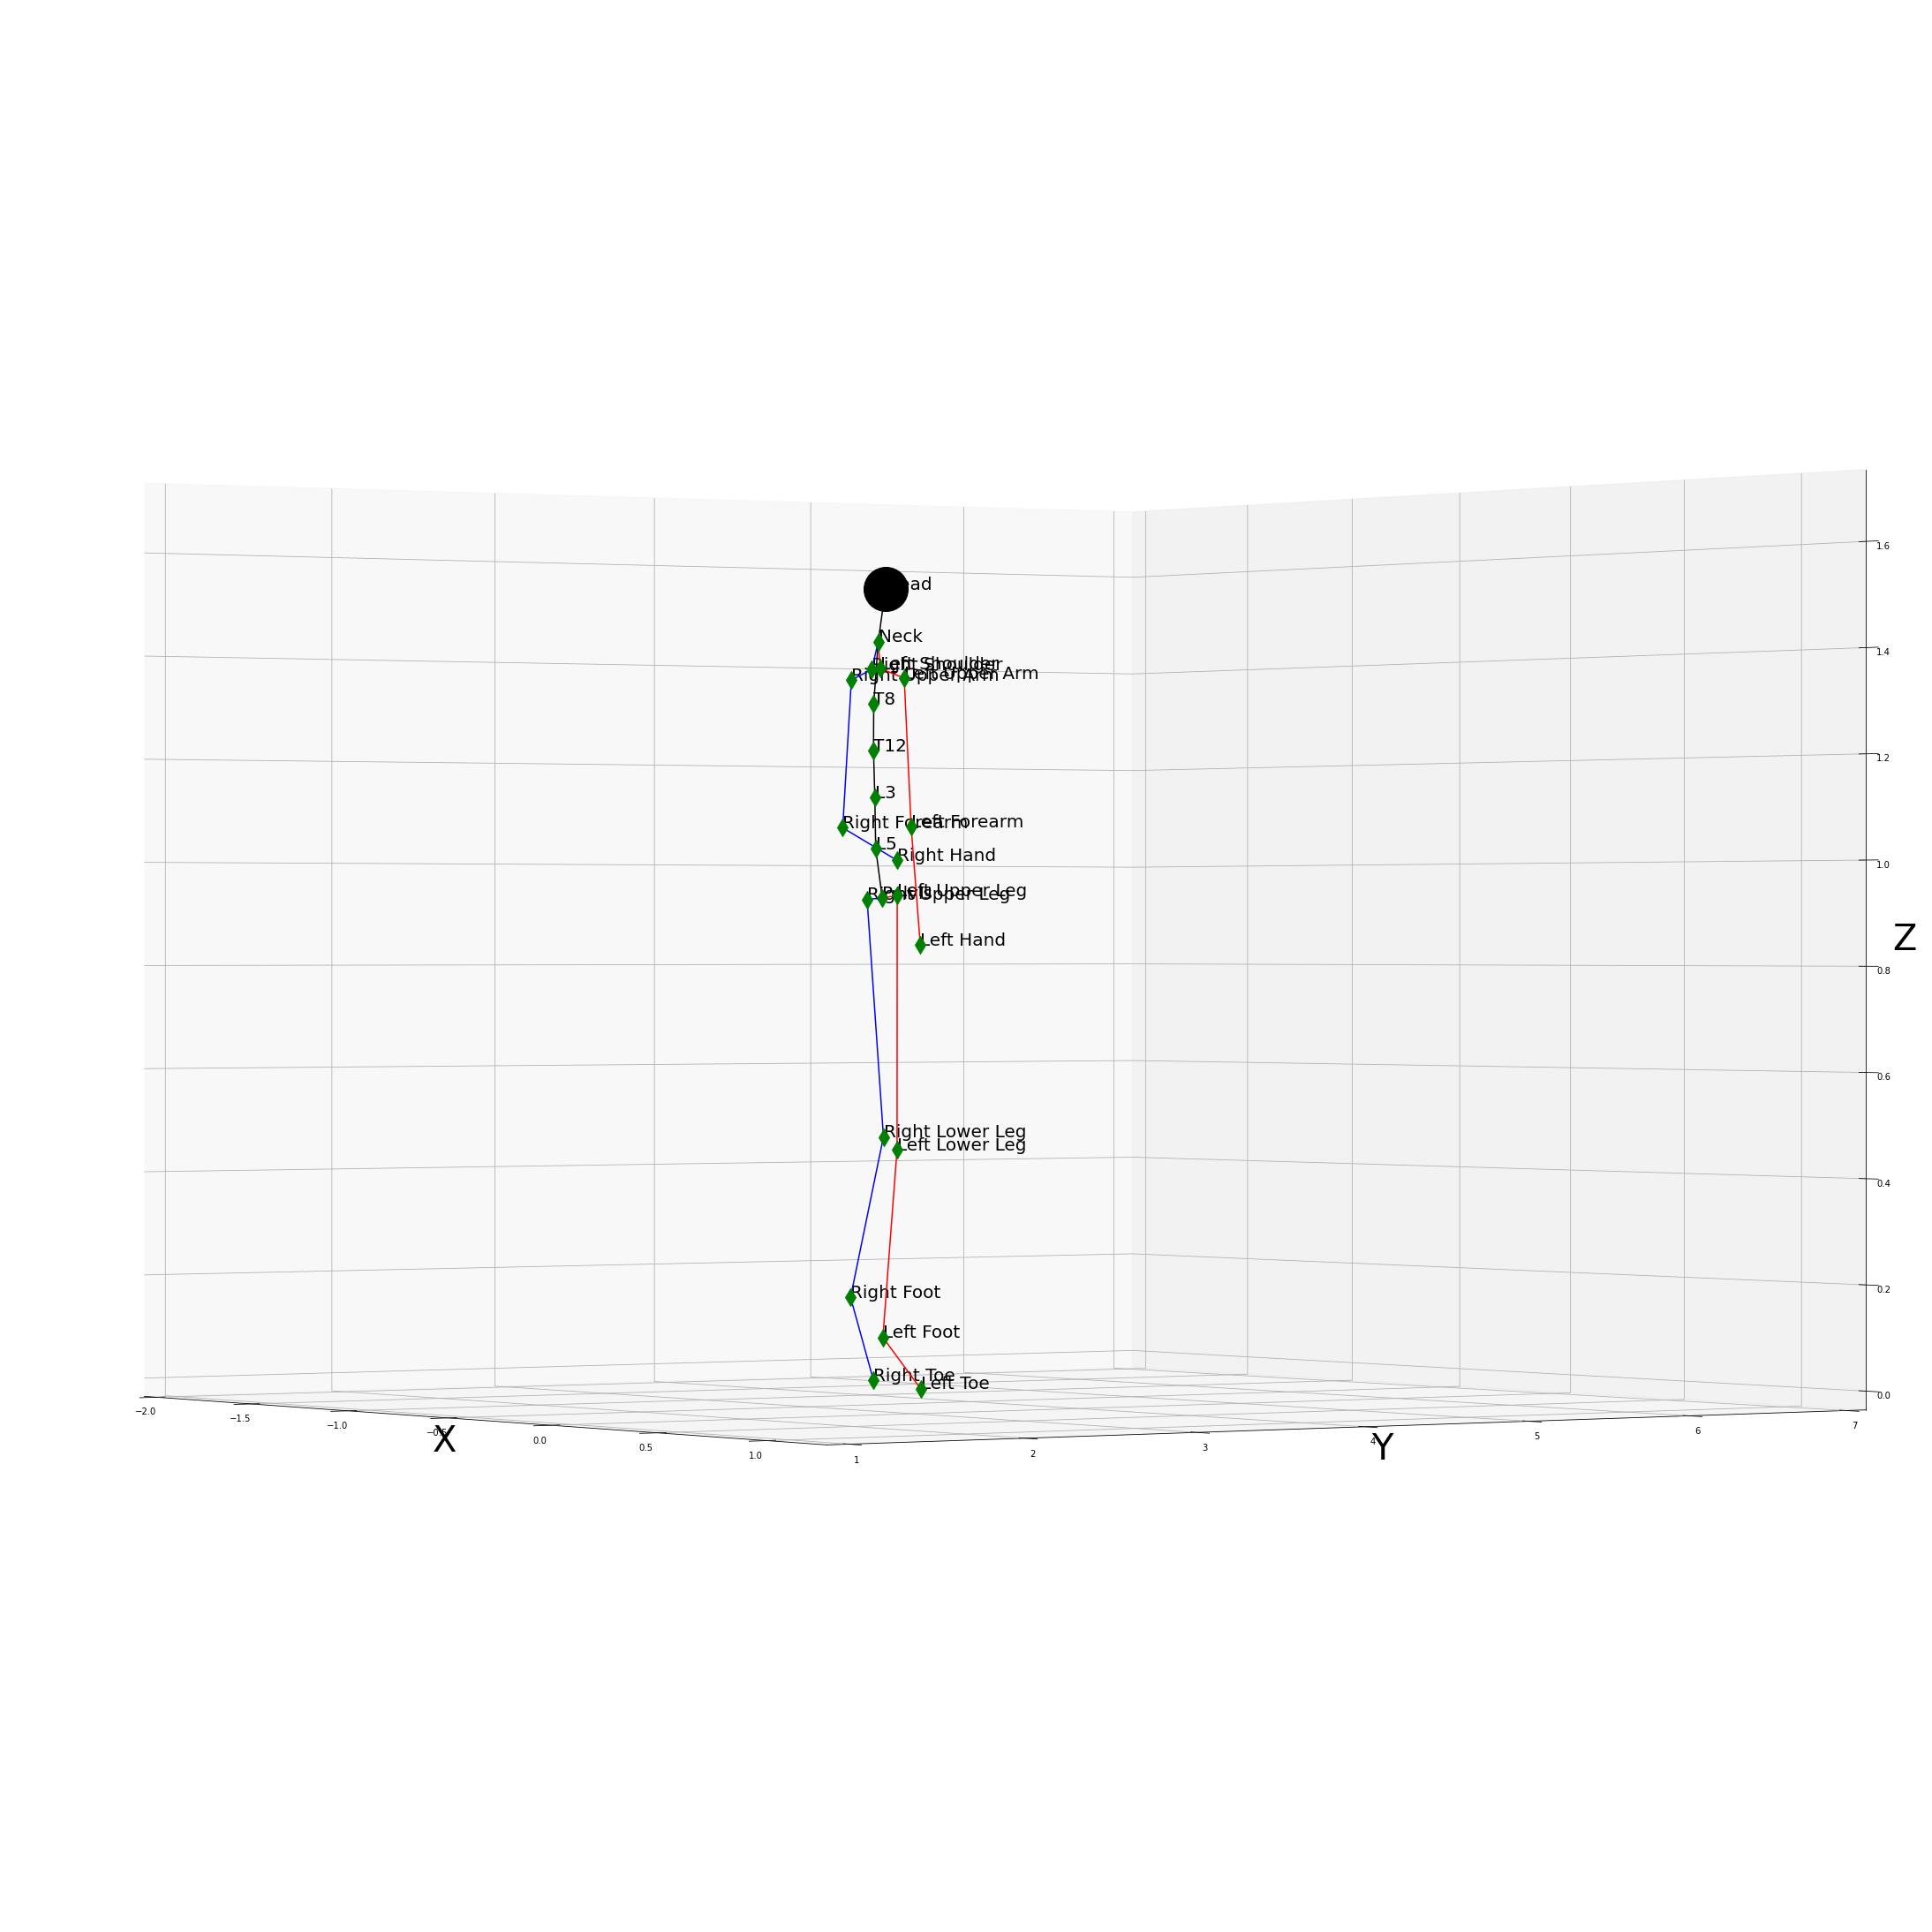

In [298]:
x_head = data.loc[:,'Head x'][4653]
y_head = data.loc[:,'Head y'][4653]
z_head = data.loc[:,'Head z'][4653]
ax7.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")
fig7

## Drawing the skeleton with the numbers of sensors :

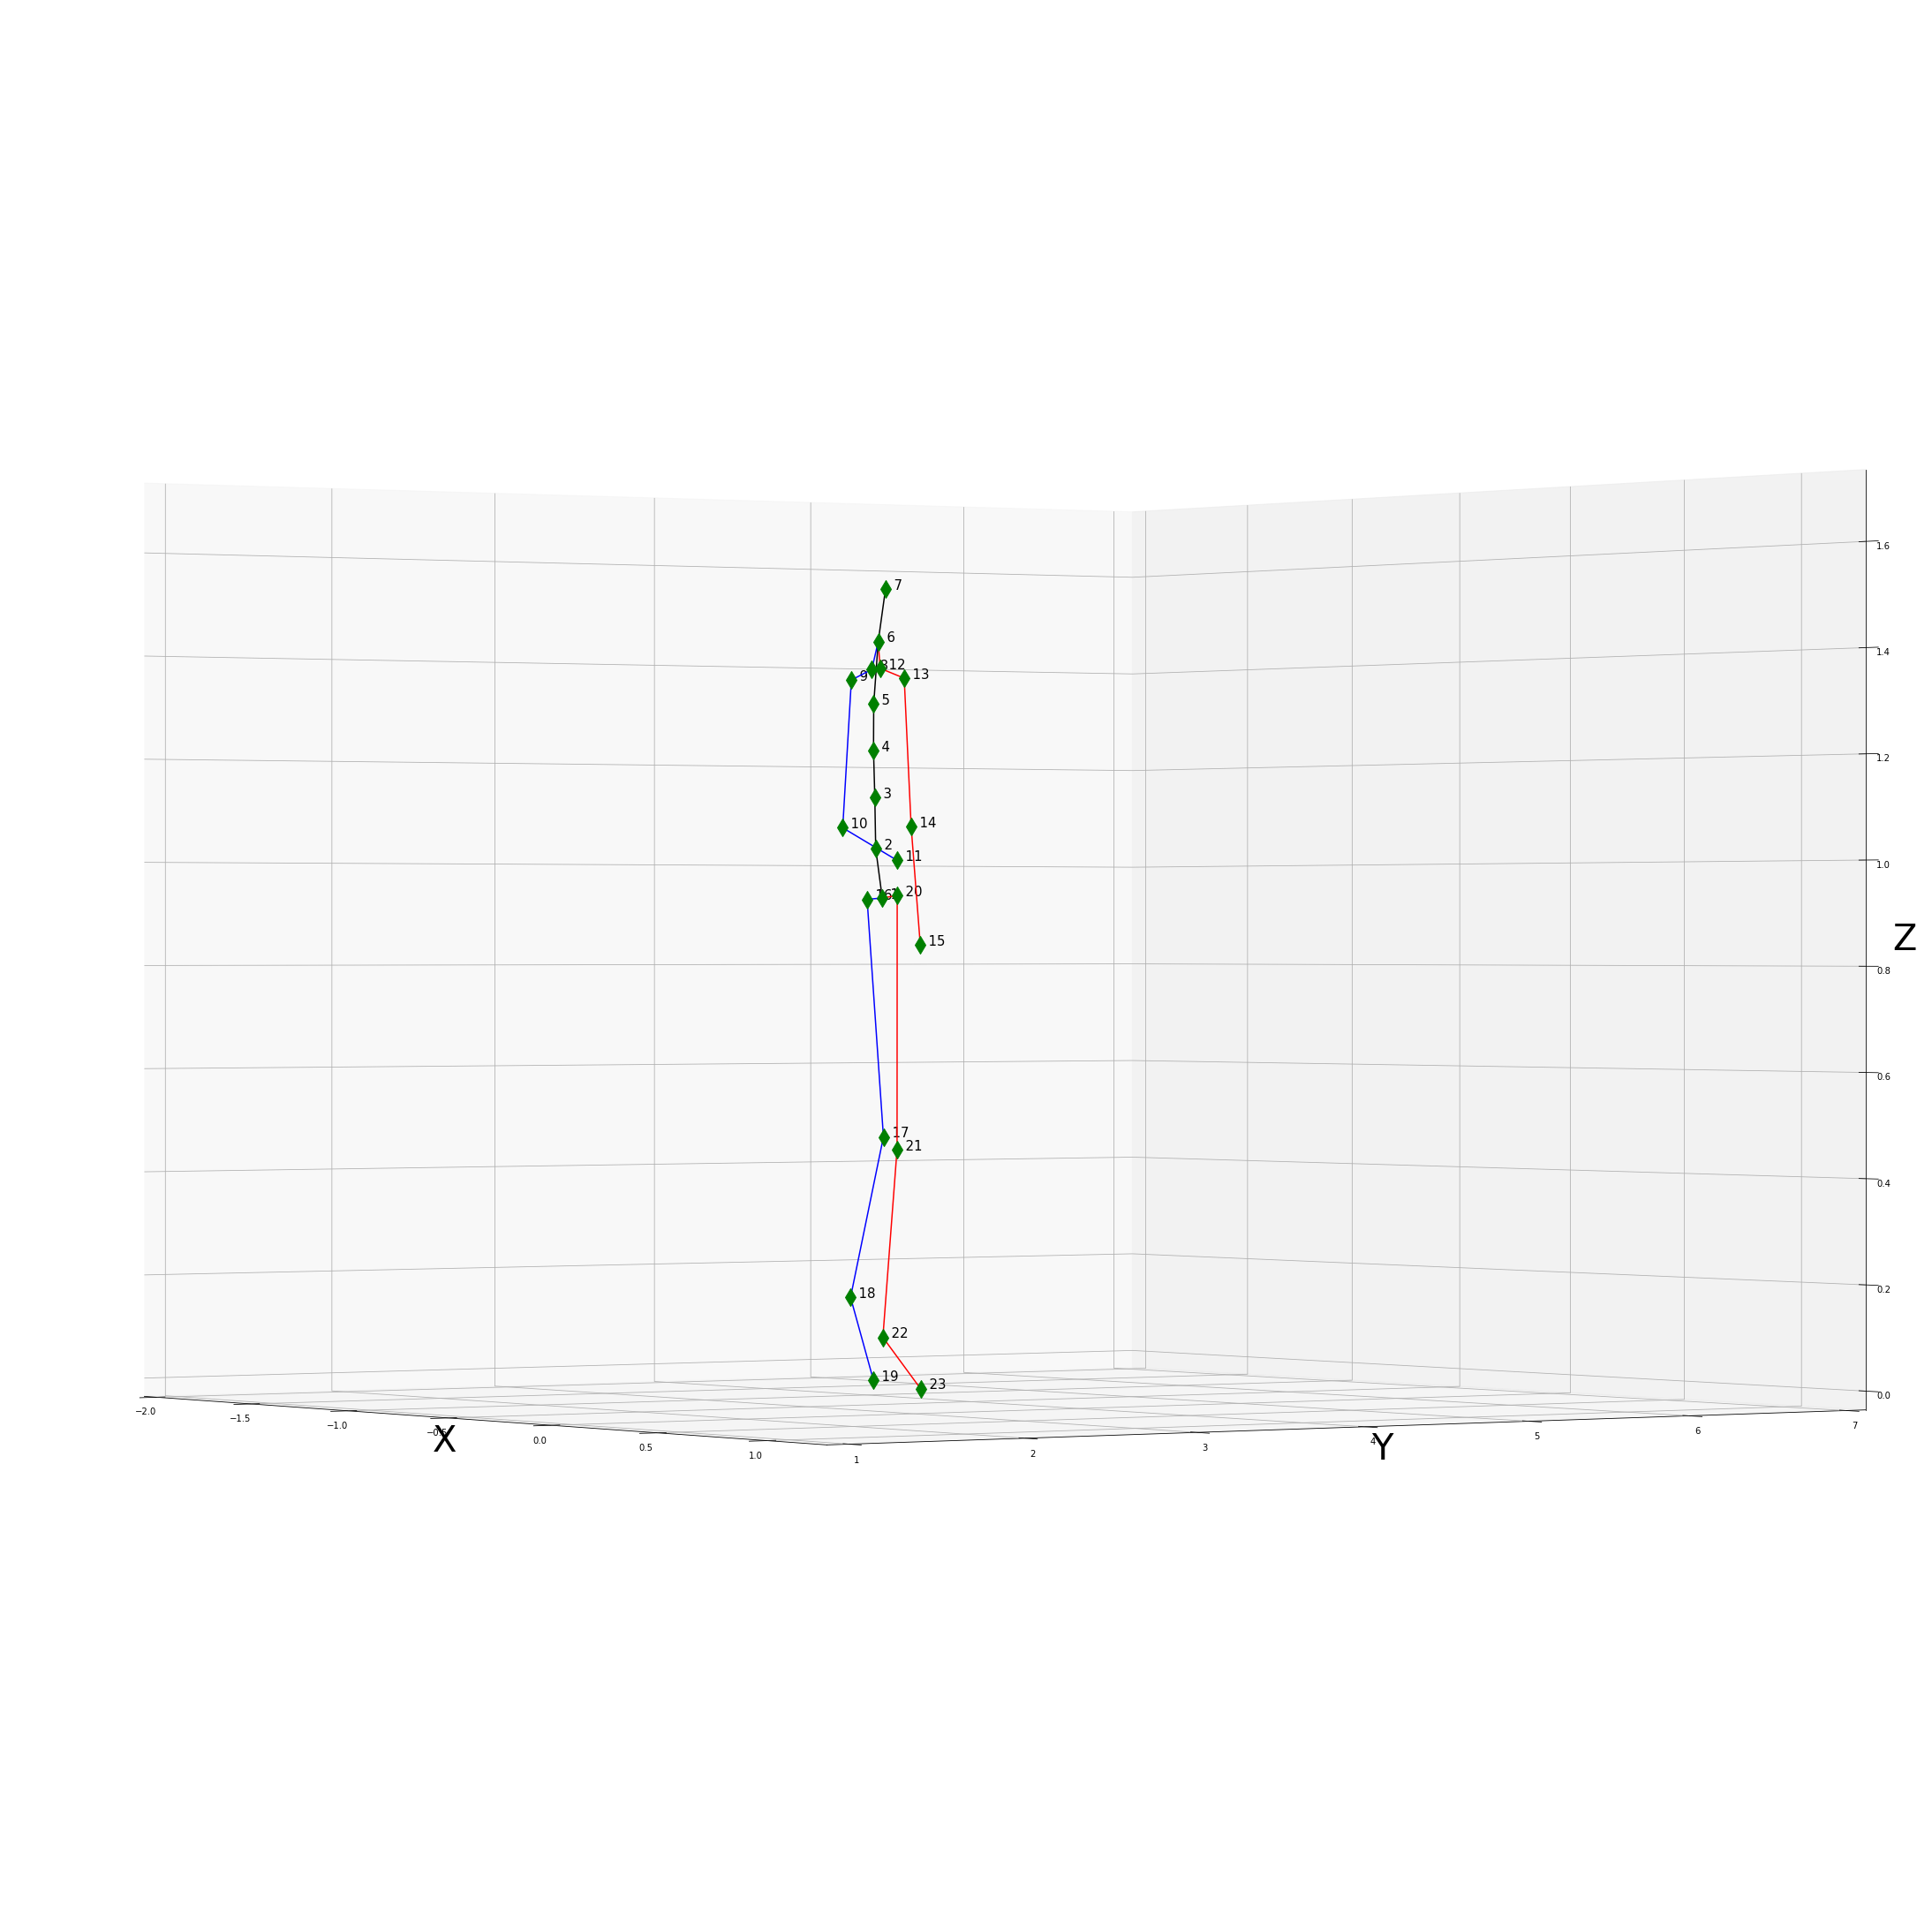

In [299]:
fig8, ax8 = new_figure()
plot_all_sensors_with_numbers(df4,ax8)
plot_all_segments(df4,ax8)
ax8.view_init(0, -35)

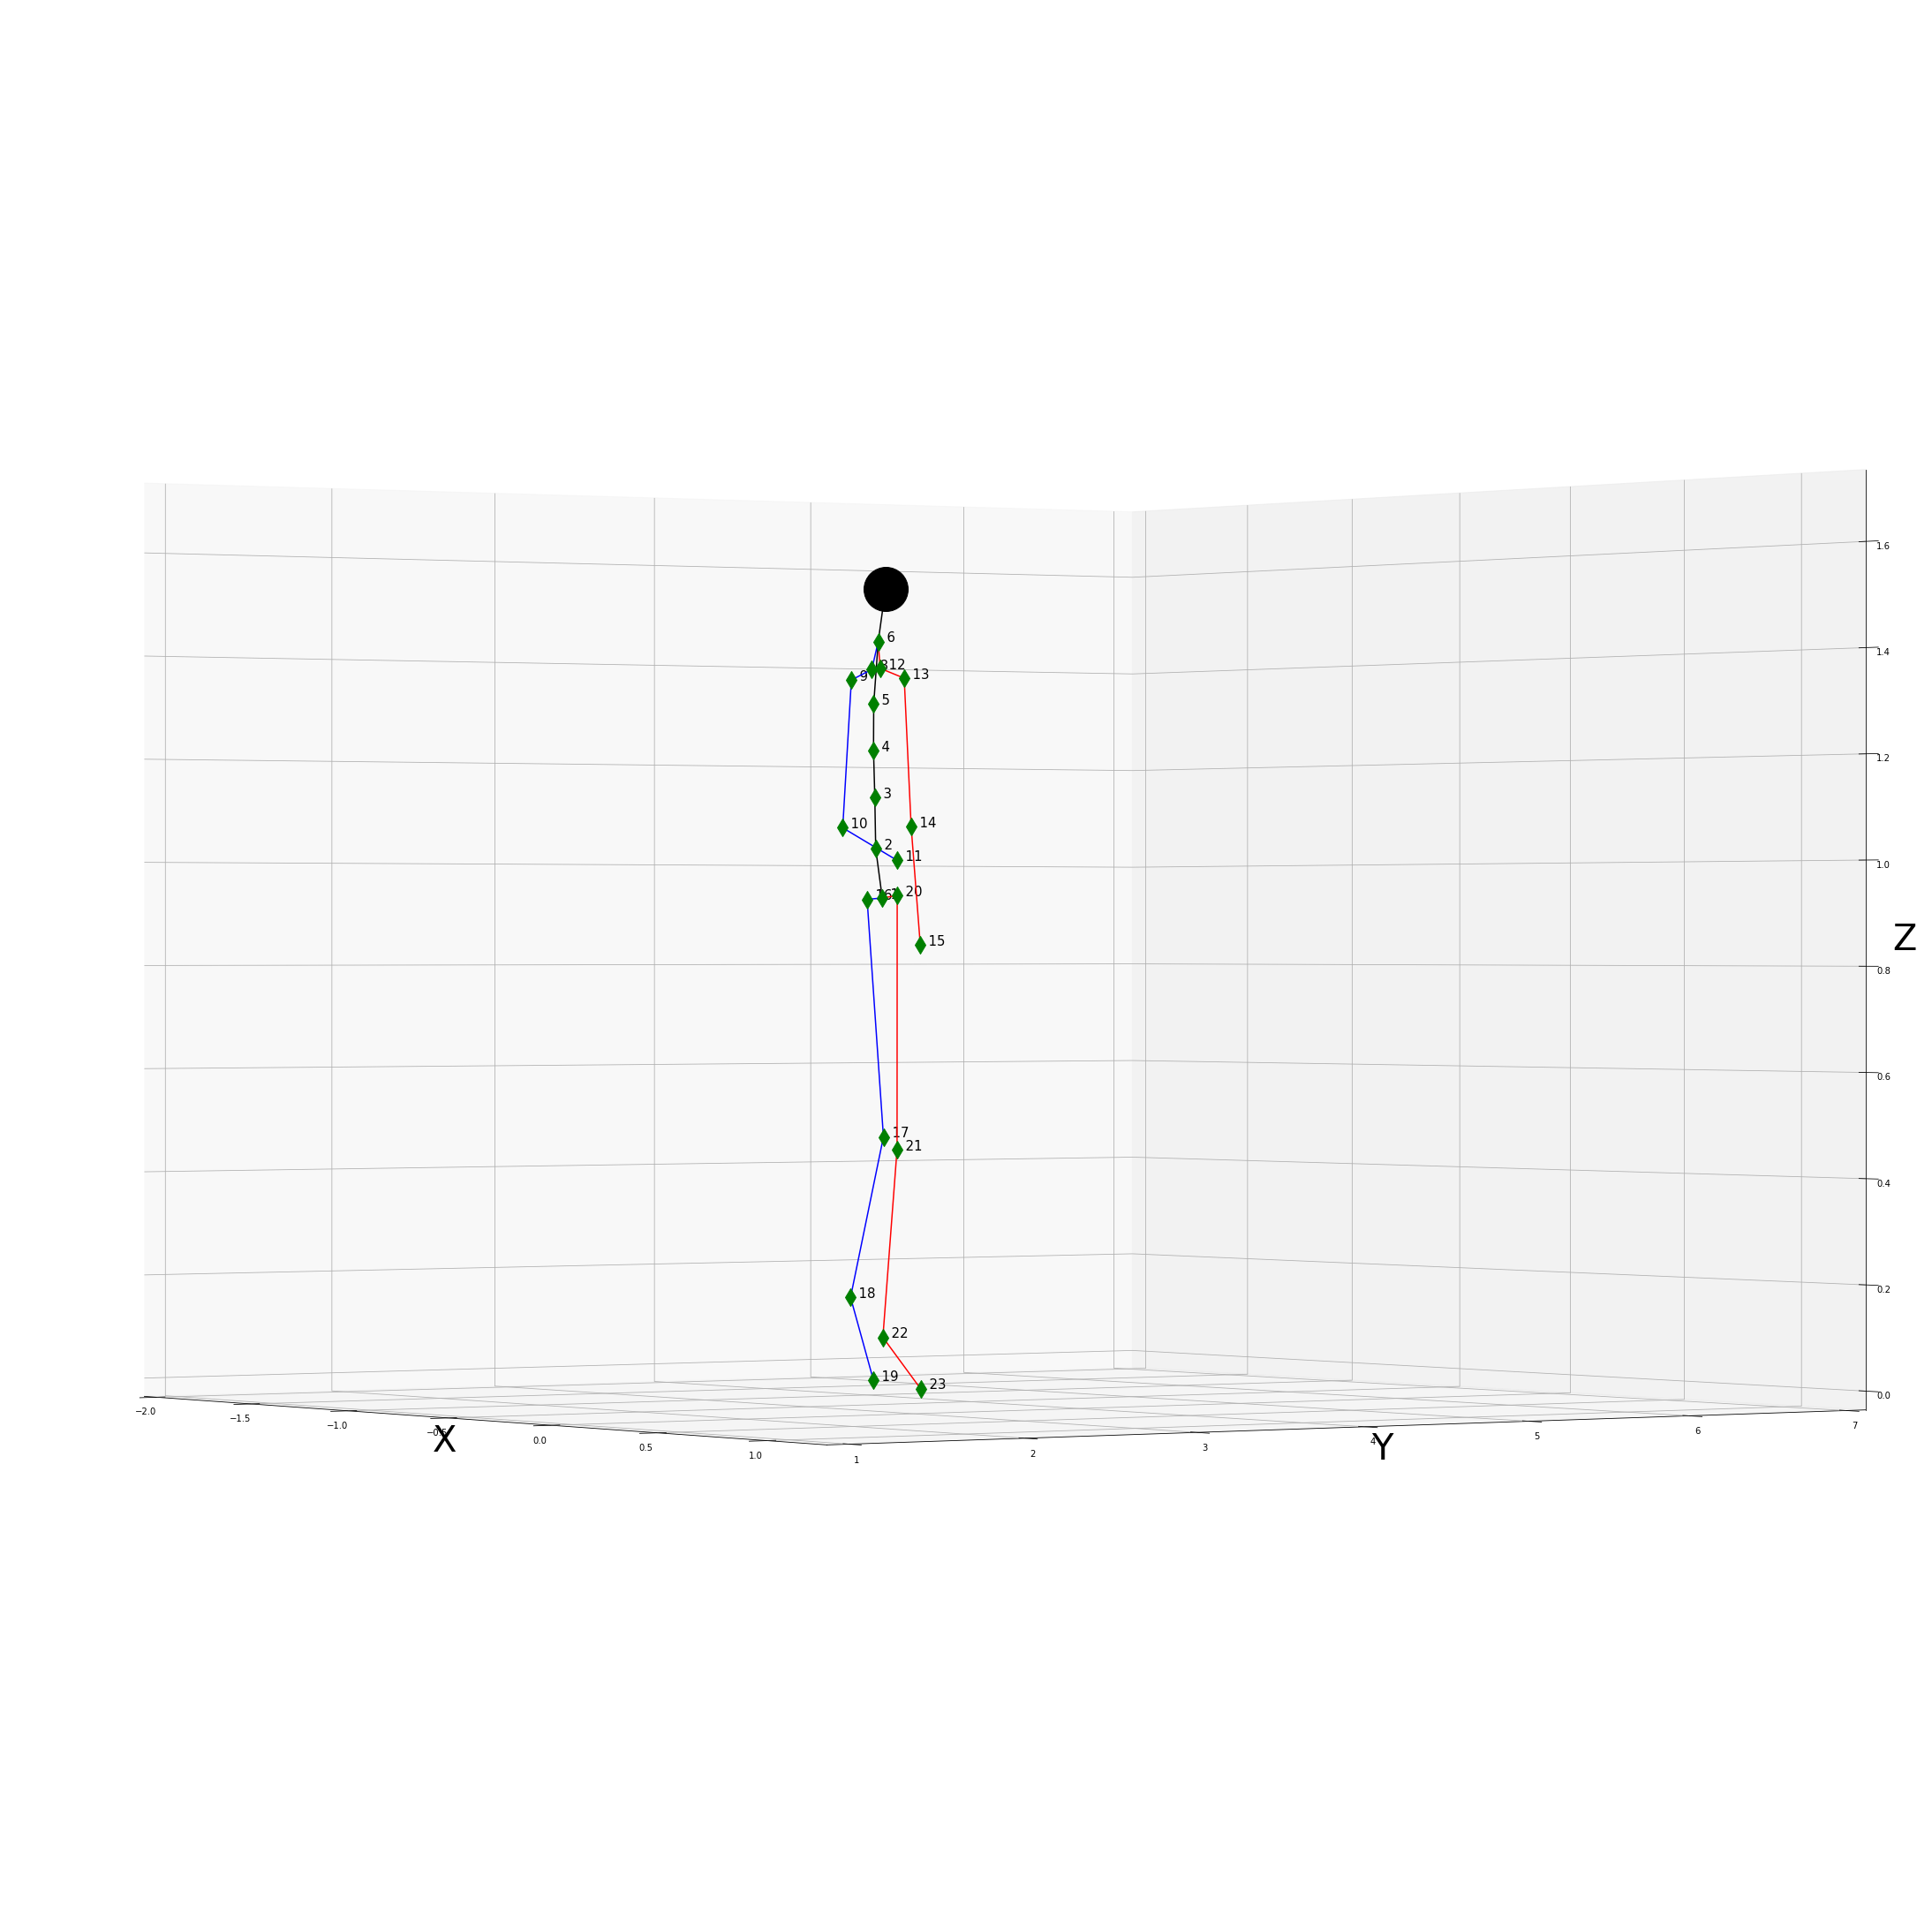

In [300]:
x_head = data.loc[:,'Head x'][4653]
y_head = data.loc[:,'Head y'][4653]
z_head = data.loc[:,'Head z'][4653]
ax8.scatter(x_head,y_head,z_head,s=2500, marker='o', color="k")
fig8

In [ ]:
images = []
ax.azim = ax.azim+1.1
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8') 
        images.append(image.reshape(300, 500, 3)) 
        imageio.mimsave('test.gif', images)